In [32]:
import pandas as pd
# import scanpy as sc

# Read dataframe
RCNs_df = pd.read_csv('/Volumes/h345/afarkkilab/Projects/NKI/Tables/ALL_cells-RNCid_v20241122.csv')
RCNs_df.head(5)

imageid               CellId   X_position  Y_position  \
0  TMA_18_810_core1  TMA_18_810_core1_c1  1078.500000  271.344828   
1  TMA_18_810_core1  TMA_18_810_core1_c2  1050.669014  274.873239   
2  TMA_18_810_core1  TMA_18_810_core1_c3   964.737828  280.842697   
3  TMA_18_810_core1  TMA_18_810_core1_c4  1036.420290  283.555556   
4  TMA_18_810_core1  TMA_18_810_core1_c5  1078.121495  282.752336   

  GlobalCellType cycif.slide cycif.core.id rcn_id  
0        Stromal  TMA_18_810         core1  RCN01  
1        Stromal  TMA_18_810         core1  RCN01  
2        Can.EMT  TMA_18_810         core1  RCN09  
3        Stromal  TMA_18_810         core1  RCN01  
4        Stromal  TMA_18_810         core1  RCN01

In [33]:
# Define the mapping dictionary
rcn_to_label = {
    'RCN01': 'Stromal', 'RCN02': 'Stromal', 'RCN03': 'Stromal',
    'RCN04': 'Cancer', 'RCN05': 'Cancer', 'RCN06': 'Cancer', 'RCN07': 'Cancer', 'RCN08': 'Cancer',
    'RCN09': 'TSI', 'RCN10': 'TSI',
    'RCN11': 'Immune', 'RCN12': 'Immune', 'RCN13': 'Immune', 'RCN14': 'Immune'
}

# Add a new column 'rcn_label' by mapping 'rcn_id' to the corresponding label
RCNs_df['rcn_label'] = RCNs_df['rcn_id'].map(rcn_to_label)
print(RCNs_df['rcn_label'].unique())

['Stromal' 'TSI' 'Immune' 'Cancer']


In [34]:
print(RCNs_df['GlobalCellType'].unique())

['Stromal' 'Can.EMT' 'Other.MY' 'CD8.T.cells' 'Other' 'CD4.T.cells'
 'Can.Basal' 'CD31.stromal' 'T.regs' 'Can.Proliferative' 'CD207.MY'
 'Can.Immunogenic' 'CD15.MY' 'CD163.MP' 'CD11c.MY' 'CD68.MP' 'B.cells'
 'Other.immune']


In [35]:
RCNs_df.describe(include='all')

imageid               CellId    X_position    Y_position  \
count             4644485              4644485  4.644485e+06  4.644485e+06   
unique                929              4644485           NaN           NaN   
top     TMA_42_961_core52  TMA_18_810_core1_c1           NaN           NaN   
freq                12978                    1           NaN           NaN   
mean                  NaN                  NaN  1.370628e+03  1.363040e+03   
std                   NaN                  NaN  4.757835e+02  4.766323e+02   
min                   NaN                  NaN  6.897436e+00  7.885057e+00   
25%                   NaN                  NaN  1.016934e+03  1.010885e+03   
50%                   NaN                  NaN  1.372612e+03  1.365201e+03   
75%                   NaN                  NaN  1.728122e+03  1.720203e+03   
max                   NaN                  NaN  2.864243e+03  2.818328e+03   

       GlobalCellType cycif.slide cycif.core.id   rcn_id rcn_label  
count         4644485     4644485       4644485  4644485   4644485  
unique             18          10           149       14         4  
top           Stromal  TMA_18_810        core48    RCN01   Stromal  
freq          1669166      719887         58099  1228850   1835118  
mean              NaN         NaN           NaN      NaN       NaN  
std               NaN         NaN           NaN      NaN       NaN  
min               NaN         NaN           NaN      NaN       NaN  
25%               NaN         NaN           NaN      NaN       NaN  
50%               NaN         NaN           NaN      NaN       NaN  
75%               NaN         NaN           NaN      NaN       NaN  
max               NaN         NaN           NaN      NaN       NaN

### Define functions for plotting

In [36]:
import numpy as np
import pandas as pd

from scipy import stats
from statannotations.Annotator import Annotator

import seaborn as sns
import matplotlib.pyplot as plt

# Define the color palette based on your specified colors
celltype_colors = {
    'Stromal': '#fed18c',  
    'CD31.stromal': '#b96432',  
    
    'Can.Basal': '#f7f0f7',  
    'Can.Proliferative': '#ffc1ff',  
    'Can.EMT': '#ff4eff',  
    'Can.Immunogenic': '#b400b4',  
    
    'CD8.T.cells': '#fa7828',  
    'CD4.T.cells': '#fa3232',  
    'T.regs': '#ffff41', 
    
    'CD11c.MY': '#ADE6E6',
    'CD15.MY': '#ADD8E6',
    'CD207.MY': '#0095B6', 
    'Other.MY': '#2F82B9',   
    
    'CD163.MP': '#8DC594',
    'CD68.MP': '#62B74F',
    'B.cells': '#7d28d7',
    
    'Other.immune': '#508791',
    'Other': '#D9DEE4'
}

sns.set_context("paper", font_scale=2)

# 1) Plot GlobalCellType distribution across spatial domains or RCNs
def plot_cell_distribution(counts, label):

    # Extract the ordered list of GlobalCellType from the dictionary
    ordered_cell_types = list(celltype_colors.keys())

    # Loop through each unique rcn_label to create separate plots
    for rcn in counts[label].unique():
        # Filter data for the current rcn_label
        data_subset = counts[counts[label] == rcn]
        
        # Create a boxplot with the specified order of cell types
        plt.figure(figsize=(8, 6))
        sns.boxplot(
            data=data_subset,
            y='GlobalCellType',
            x='proportion',
            orient='h',
            palette=celltype_colors,  # Apply the custom color palette
            order=ordered_cell_types  # Specify the order of rows
        )
        
        # Add titles and labels
        plt.title(f'Proportion Distribution of GlobalCellTypes within {rcn}')
        plt.xlabel('Proportion')
        plt.ylabel('GlobalCellType')
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        
        # Display the plot
        plt.show()
        
# 2) Function to plot heatmap for selected data of median proportion across RCNs
def plot_celldist_heatmap(counts, subset):
    
    # Calculate the median proportion for each combination of GlobalCellType and rcn_label
    median_proportions = (
        counts
        .groupby(['GlobalCellType', 'rcn_id'])['proportion']
        .median()
        .reset_index()
    )

    # Pivot the dataframe to have GlobalCellType as rows and rcn_label as columns
    heatmap_data = median_proportions.pivot(
        index='GlobalCellType', 
        columns='rcn_id', 
        values='proportion'
    )

    # Reorder the rows of the heatmap based on your specified order
    ordered_cell_types = list(celltype_colors.keys())
    heatmap_data = heatmap_data.reindex(ordered_cell_types)
    
    if subset == 'Stromal':
        selected_data = heatmap_data.loc[['Stromal', 'CD31.stromal']]
    elif subset == 'Cancer':
        selected_data = heatmap_data.loc[['Can.Basal', 'Can.Proliferative', 'Can.EMT', 'Can.Immunogenic']]
    elif subset == 'Immune':
        selected_data = heatmap_data.loc[['CD8.T.cells', 'CD4.T.cells', 'T.regs', 'CD11c.MY', 'CD15.MY', 'CD207.MY', 'Other.MY', 'CD163.MP', 'CD68.MP', 'B.cells']]
        
    print(selected_data.shape)
    
    # Plot the heatmap
    plt.figure(figsize=(14, selected_data.shape[0]/2))
    sns.heatmap(
        selected_data, 
        cmap='coolwarm',  # You can change the color palette as needed
        annot=True,       # Display the median values in the cells
        linewidths=0.5,   # Add grid lines for better separation
        cbar_kws={'label': 'Median Proportion'}
    )

    # Set titles and labels
    plt.title(f'Median Proportion of {subset} GlobalCellTypes across RCN Labels')
    plt.xlabel('RCN Label')
    plt.ylabel('GlobalCellType')

    plt.show()
    
# 3) Function to plot box plots for each RCN in PDS and IDS
def plot_rcnproportion_boxplot(df_grouped, level):
    
    # Set up the plot
    plt.figure(figsize=(14, 6))
    ax = sns.boxplot(
        data=df_grouped,
        x='rcn_id',
        y='proportion',
        hue='therapy_sequence',
        hue_order=['PDS','IDS'],
        palette='Set2'
    )

    # Prepare pairs for statistical comparison
    pairs = [((rcn, 'PDS'), (rcn, 'IDS')) for rcn in df_grouped['rcn_id'].unique()]
    print(pairs)

    # Initialize the Annotator
    annotator = Annotator(
        ax, 
        pairs, 
        data=df_grouped, 
        x='rcn_id', 
        y='proportion', 
        hue='therapy_sequence'
    )

    # Perform Mann–Whitney U tests and add annotations
    annotator.configure(
        test='Mann-Whitney',
        text_format='star',
        loc='inside',
        verbose=2
    )
    annotator.apply_and_annotate()

    # Finalize the plot
    plt.title(f'Proportion of Cells for Each RCN in Each {level} with Mann-Whitney U Test')
    plt.xlabel('RCN')
    plt.ylabel('Proportion of Cells')
    plt.xticks(rotation=45)
    plt.legend(title='Therapy Sequence')
    plt.tight_layout()
    plt.show()

# 4) Function to plot fold change of median proportion between RCN9 and RCN10
def plot_foldchnage_scatter(counts, ordered_celltypes, filename, size = (7, 8)):
    
    # Initialize empty DataFrames to store results
    rcn9to10_df = pd.DataFrame(columns=['CellType', 'FoldChange', '-Log10Pvalue'])
    rcn10to9_df = pd.DataFrame(columns=['CellType', 'FoldChange', '-Log10Pvalue'])

    for celltype in counts['GlobalCellType'].unique():
        
        cell_df = counts[counts['GlobalCellType']==celltype]
        
        rcn9_df = cell_df[cell_df['rcn_id']=='RCN09']
        rcn10_df = cell_df[cell_df['rcn_id']=='RCN10']
        
        rcn9_values = rcn9_df['proportion'].values
        rcn10_values = rcn10_df['proportion'].values
        
        # Perform Mann-Whitney U-test
        u_stat, p_value = stats.mannwhitneyu(rcn9_values, rcn10_values)
        #print("Mann whitney U test: ", u_stat, "P-value", p_value)
        
        # Add the results to the result_df
        rcn9to10_df = rcn9to10_df.append({'CellType': celltype, 'FoldChange':np.median(rcn9_values)/np.median(rcn10_values), '-Log10Pvalue': -np.log10(p_value)},
                                        ignore_index=True)

        rcn10to9_df = rcn10to9_df.append({'CellType': celltype, 'FoldChange':np.log2(np.median(rcn10_values)/np.median(rcn9_values)), '-Log10Pvalue': -np.log10(p_value)},
                                        ignore_index=True)

    # Combine as one dataframe
    #result_df = pd.concat([stromalcancer_rcn9to10_df, immune_rcn10to9_df])
    result_df = rcn10to9_df

    # Set the CellType column as a categorical type with the defined order
    result_df['CellType'] = pd.Categorical(result_df['CellType'], categories=ordered_celltypes, ordered=True)

    # Sort the DataFrame based on the CellType column
    result_df = result_df.sort_values('CellType')
    print(result_df)
    
    #sns.set(style='white')
    plt.figure(figsize=size)

    # Scatter plot with dynamic dot size and color
    sns.scatterplot(x=result_df['FoldChange'],
                    y=result_df['CellType'], 
                    size=result_df['-Log10Pvalue'],
                    sizes=(40, 200),
                    legend=True, 
                    edgecolor='#363732', 
                    #hue = result_df['Category'],
                    facecolor = '#363732',
                    #palette={'RCN9 vs RCN10':'#cd9965', 'RCN10 vs RCN9': '#6599cd'},
                    linewidth = 3)

    # Add reference line at 1 (fold change)
    plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.8)

    # Customize plot labels and title
    plt.xlabel('Log2(Fold Change)')
    plt.ylabel('GlobalCellType')
    plt.title('Dot Plot of Fold Change of Median Proportions')
    
    # Calculate the maximum value of the FoldChange column
    max_proportion = result_df['FoldChange'].max()
    
    # Define the custom tick labels
    # tick_labels = [-10, -5, 0, 5, 10]
    # Set the custom x-axis ticks
    # plt.xticks(tick_labels)

    # Remove the top and right spines (the black frame)
    sns.despine(left=True, bottom=False, right=True, top=True)

    # Adjust layout
    plt.tight_layout()
    plt.savefig(filename) 
    plt.show()
        
# 5) Function to plot fold change between PDS and IDC RCN median proportions
def plot_foldchange_inIDSandPDS(df_grouped):
    
    # Calculate fold change of medians between PDS and IDS for each rcn_id
    fold_changes = []
    for rcn_id in df_grouped['rcn_id'].unique():
        
        # Define PDS and IDS proportion values
        pds_values = df_grouped[(df_grouped['rcn_id'] == rcn_id) & (df_grouped['therapy_sequence'] == 'PDS')]['proportion'].values 
        ids_values = df_grouped[(df_grouped['rcn_id'] == rcn_id) & (df_grouped['therapy_sequence'] == 'IDS')]['proportion'].values 
        
        # Calculate median proportion for PDS and IDS
        pds_median = np.median(pds_values)
        ids_median = np.median(ids_values)
        
        # Perform Mann-Whitney U-test
        u_stat, p_value = stats.mannwhitneyu(ids_values,pds_values)
        print("Mann whitney U test: ", u_stat, "P-value", p_value)
        
        # Calculate fold change (handle division by zero)
        fold_change = ids_median/pds_median  if pds_median != 0 else np.nan
        
        # Record results
        fold_changes.append({'rcn_id': rcn_id, 'fold_change': fold_change, 'p_value':p_value})

    # Convert results to a DataFrame
    fc_df = pd.DataFrame(fold_changes)

    # Prepare data for visualization
    fc_df['enriched_in'] = np.where(fc_df['fold_change'] > 1, 'IDS', 'PDS')
    fc_df['log2_fold_change'] = np.log2(fc_df['fold_change'].replace(0, np.nan))  # Log2 transformation
    # fc_df['abs_log2_fold_change'] = fc_df['log2_fold_change'].abs()
    # fc_df_sorted = fc_df.sort_values('abs_log2_fold_change', ascending=False)

    fc_df['colorcategories'] = np.where(
        fc_df['p_value'] > 0.05, 'p>0.05', 
        np.where(fc_df['enriched_in'] == 'IDS', 'IDS', 'PDS')
    )

    # Set seaborn style and plot
    #sns.set(style='whitegrid')
    plt.figure(figsize=(4, 7))
    sns.barplot(
        data=fc_df,
        y='rcn_id',
        x='log2_fold_change',
        hue='colorcategories',
        palette=['#d97d7d','#D9DEE4','#C5DEF7'],
        dodge=False
    )

    # Remove the top and right spines (the black frame)
    sns.despine(left=False, bottom=True, right=True, top=True)

    # Adding a central vertical line to separate the groups
    plt.axvline(0, color='gray', linestyle='--')

    # Labels and aesthetics
    plt.xlabel('Log2 Fold Change (IDS vs PDS)')
    plt.ylabel('')
    
    # Define the custom tick labels
    tick_labels = [-4, -2, 0, 1, 2]
    # Set the custom x-axis ticks
    plt.xticks(tick_labels)
    
    plt.title('Enrichment of RCNs in IDS vs PDS')
    plt.legend(title='Enriched in', loc='upper left')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig("/Volumes/h345/afarkkilab/Projects/NKI/RCN_exploration/FCofRCNmedianproportions_IDCvsPDS.svg") 
    plt.show()


## Core-level

### Proportions of cells across RCN domains

            imageid rcn_label GlobalCellType  count  proportion
0  TMA_18_810_core1    Cancer       CD11c.MY      7    0.001852
1  TMA_18_810_core1    Cancer        CD15.MY      4    0.001058
2  TMA_18_810_core1    Cancer       CD163.MP     14    0.003705
3  TMA_18_810_core1    Cancer       CD207.MY      4    0.001058
4  TMA_18_810_core1    Cancer   CD31.stromal     16    0.004234


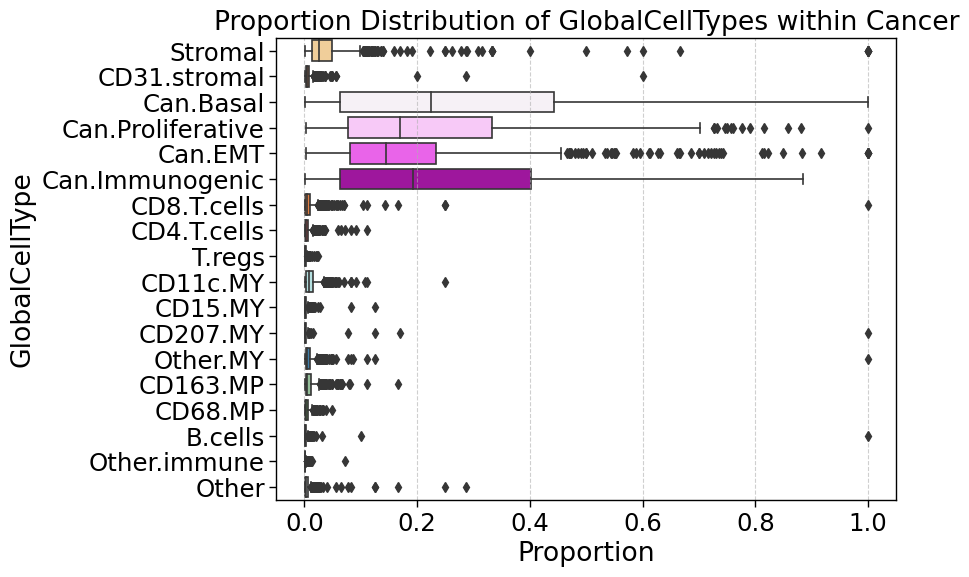

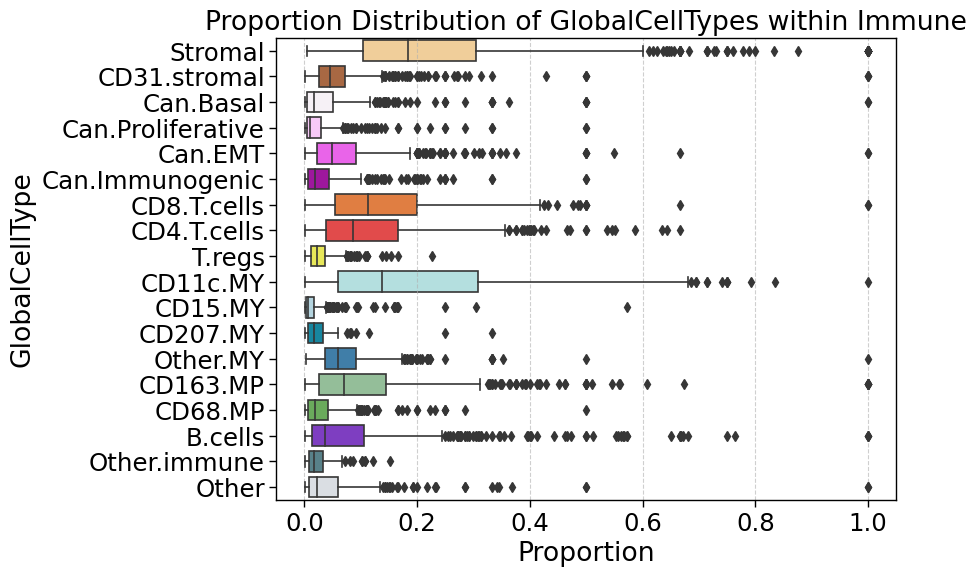

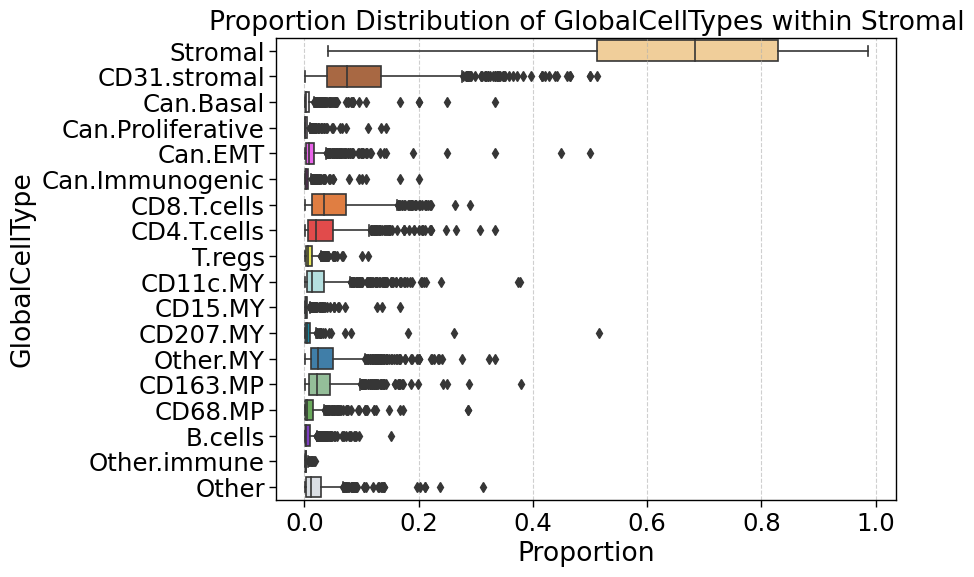

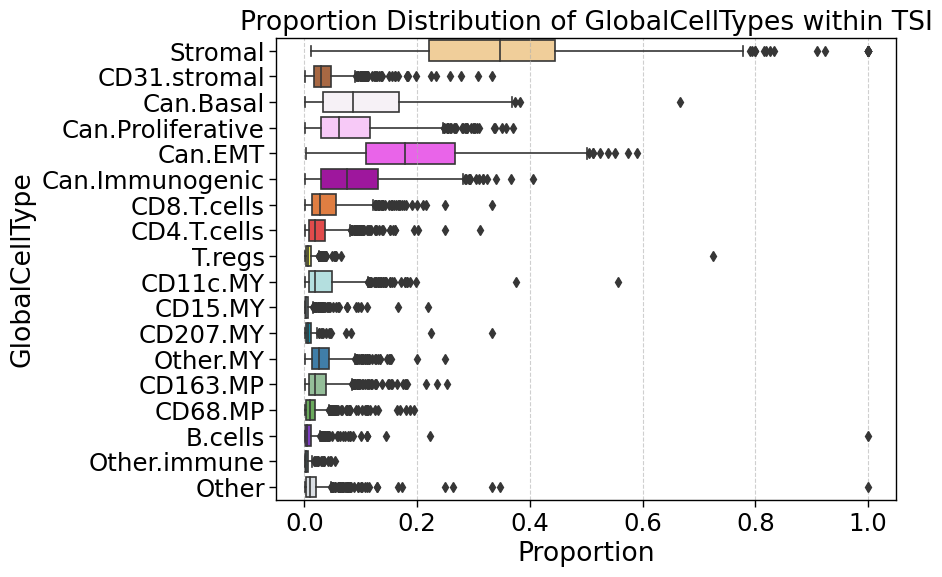

In [37]:
# Group by imageid, rcn_label, and GlobalCellType, then count occurrences
spatdoms_counts = (
    RCNs_df
    .groupby(['imageid', 'rcn_label', 'GlobalCellType'])
    .size()
    .reset_index(name='count')
)

# Calculate the total counts for each imageid and rcn_label combination
total_counts = spatdoms_counts.groupby(['imageid', 'rcn_label'])['count'].transform('sum')

# Add a new column for the proportion of each GlobalCellType within each rcn_label and imageid
spatdoms_counts['proportion'] = spatdoms_counts['count'] / total_counts

# View the resulting dataframe
print(spatdoms_counts.head())

plot_cell_distribution(spatdoms_counts, 'rcn_label')

### Proportions of cells across RCNs

In [38]:
cancer_RCNs_df = RCNs_df.loc[RCNs_df['GlobalCellType'].isin(['Can.EMT', 'Can.Basal', 'Can.Proliferative', 'Can.Immunogenic'])]
noncancer_RCNs_df = RCNs_df.loc[~RCNs_df['GlobalCellType'].isin(['Can.EMT', 'Can.Basal', 'Can.Proliferative', 'Can.Immunogenic'])]

            imageid rcn_id GlobalCellType  count  proportion
0  TMA_18_810_core1  RCN01        CD15.MY      1    0.002273
1  TMA_18_810_core1  RCN01   CD31.stromal     69    0.156818
2  TMA_18_810_core1  RCN01    CD4.T.cells     22    0.050000
3  TMA_18_810_core1  RCN01    CD8.T.cells      9    0.020455
4  TMA_18_810_core1  RCN01        Can.EMT      4    0.009091


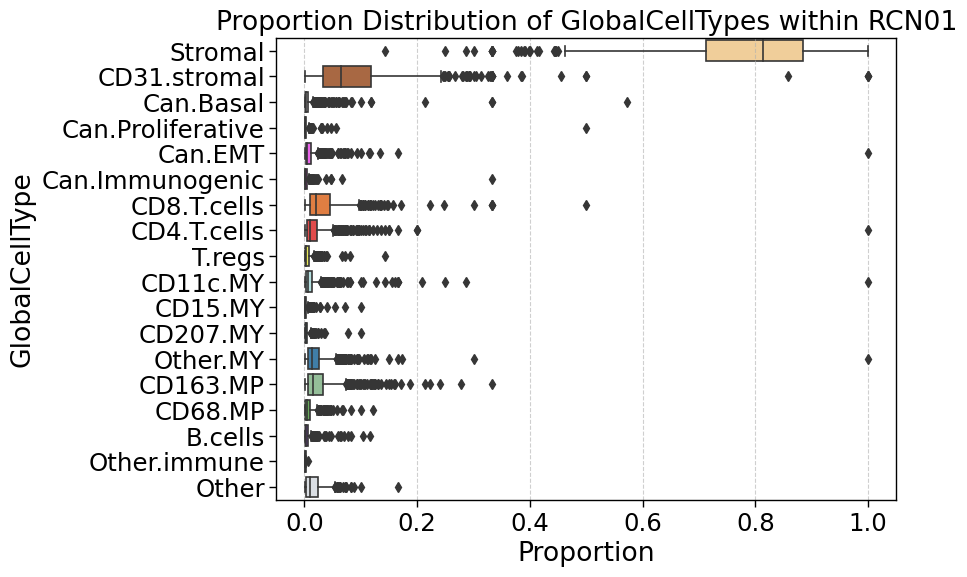

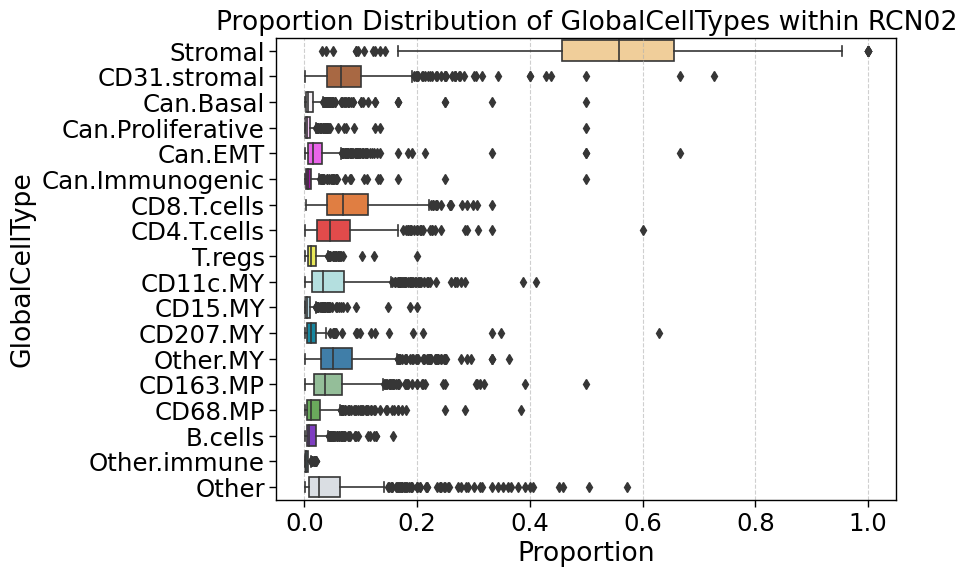

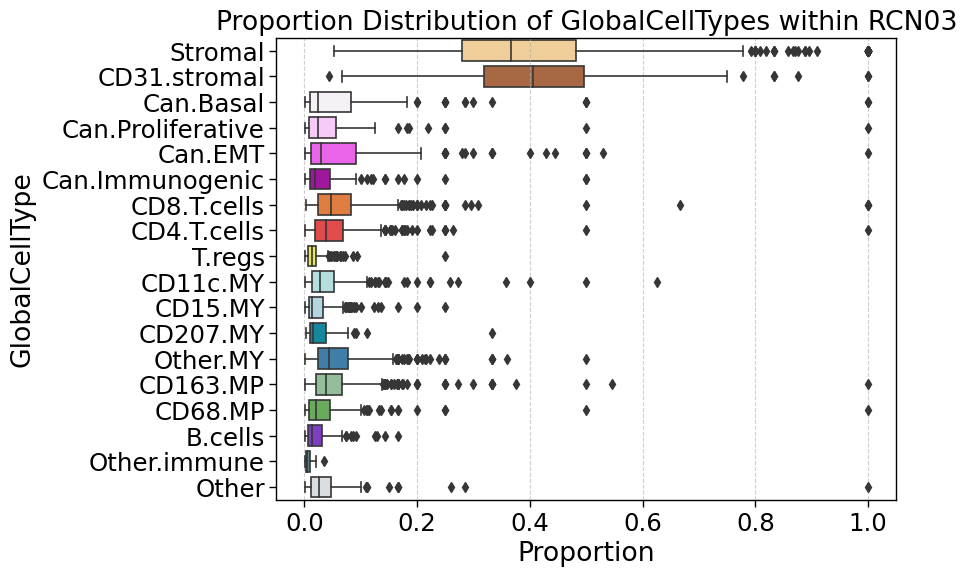

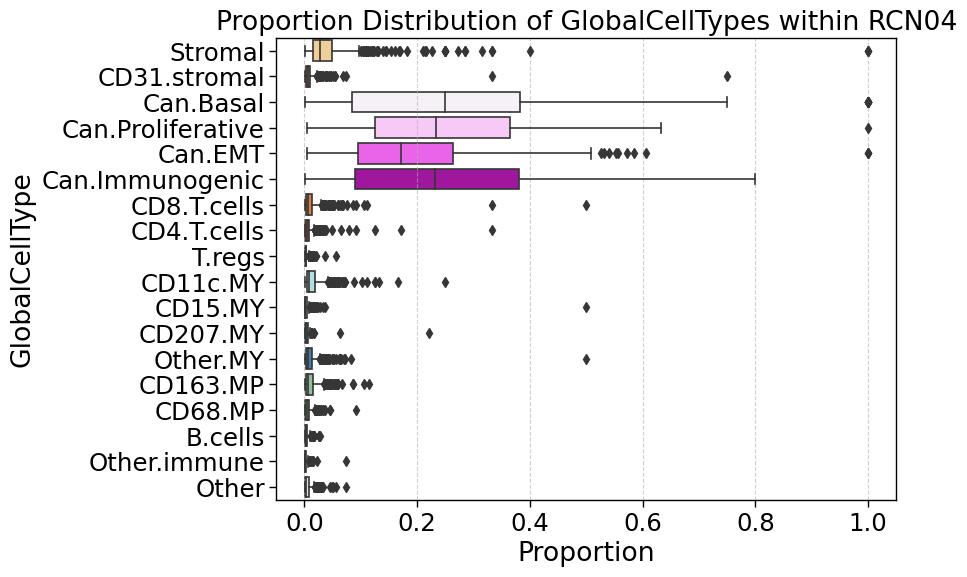

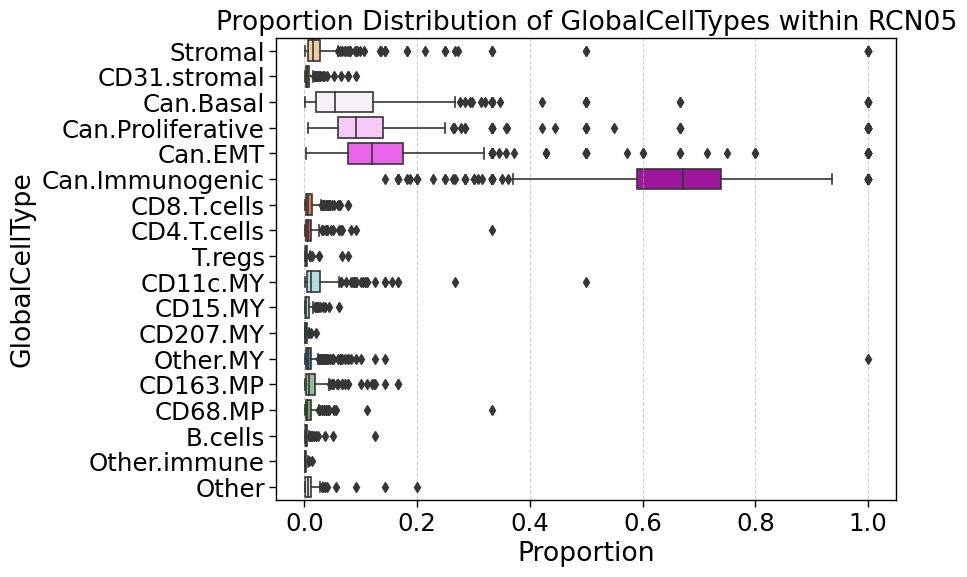

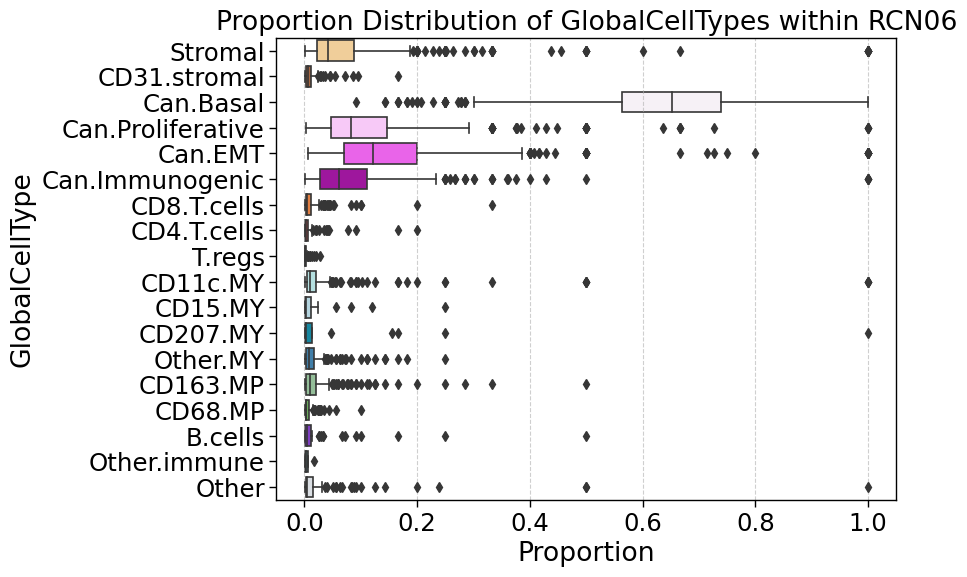

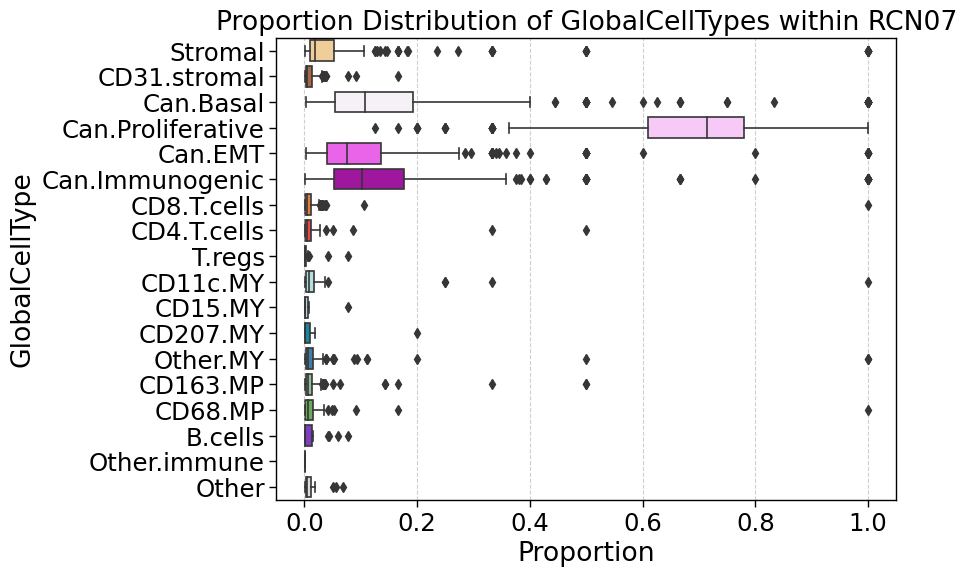

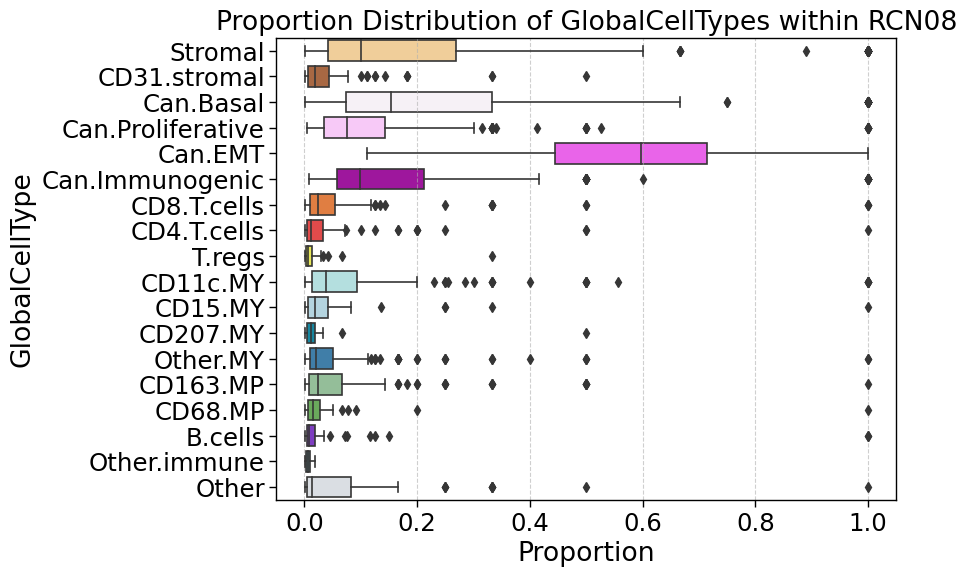

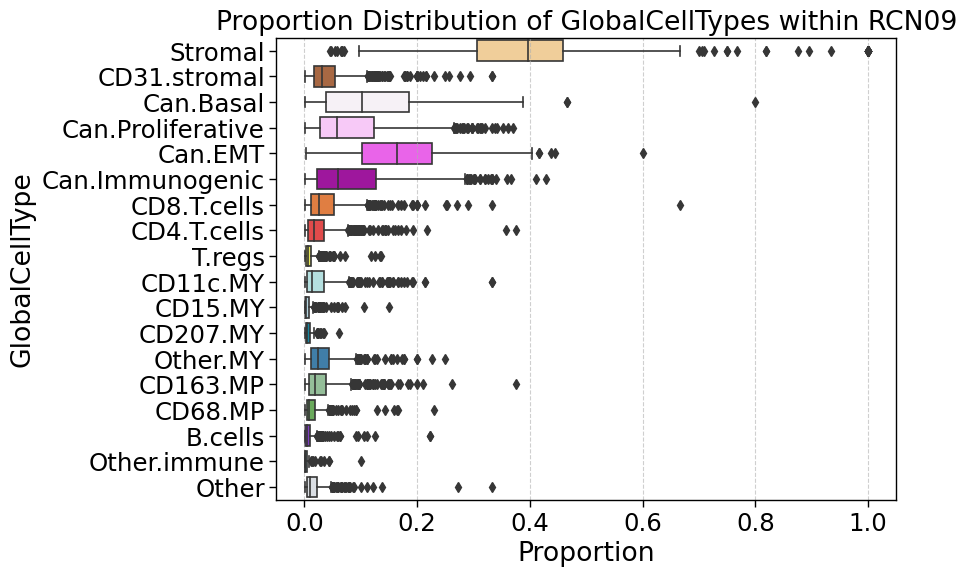

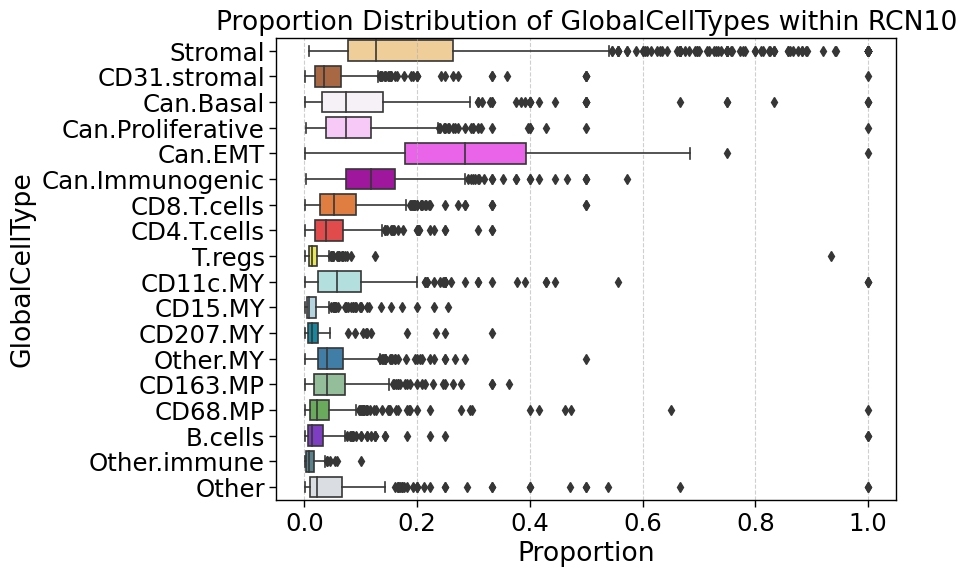

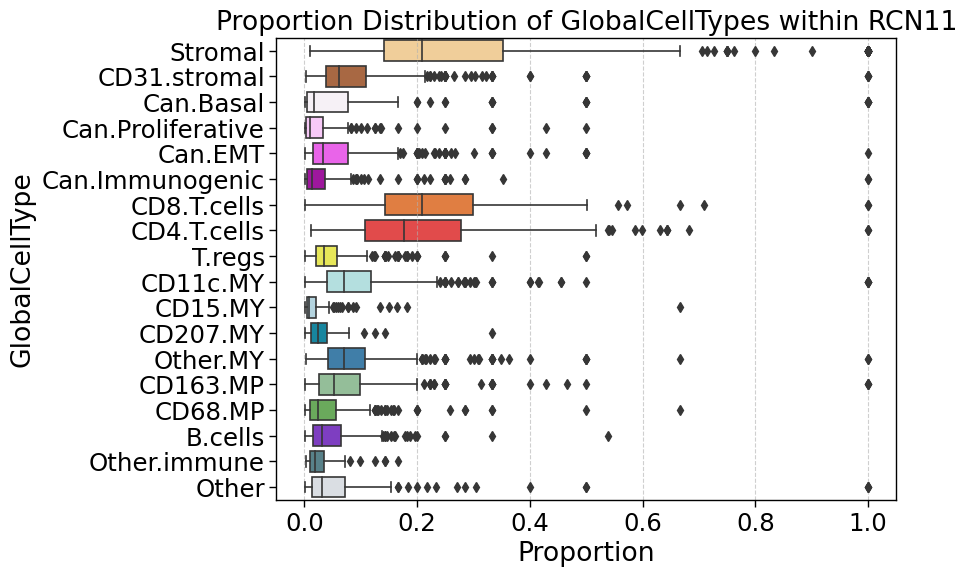

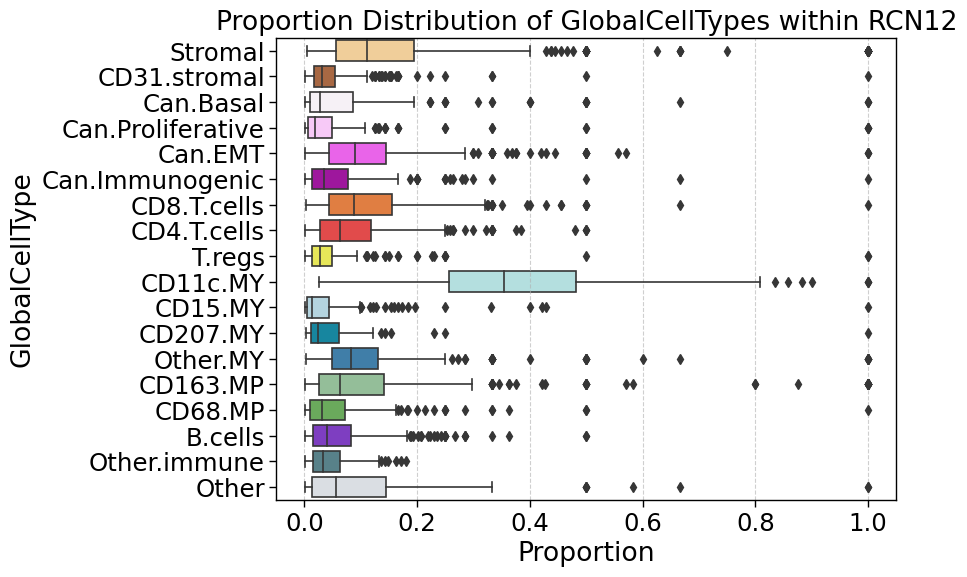

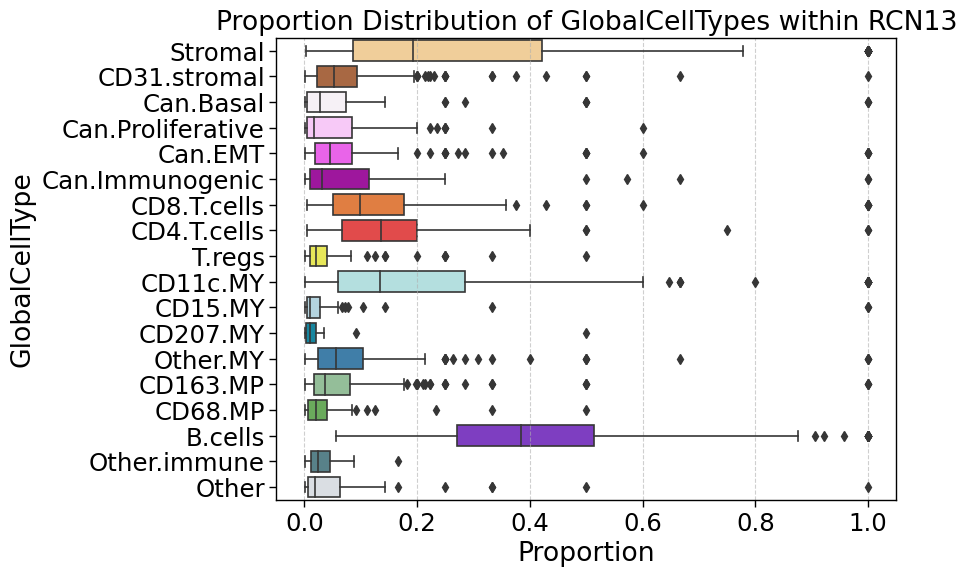

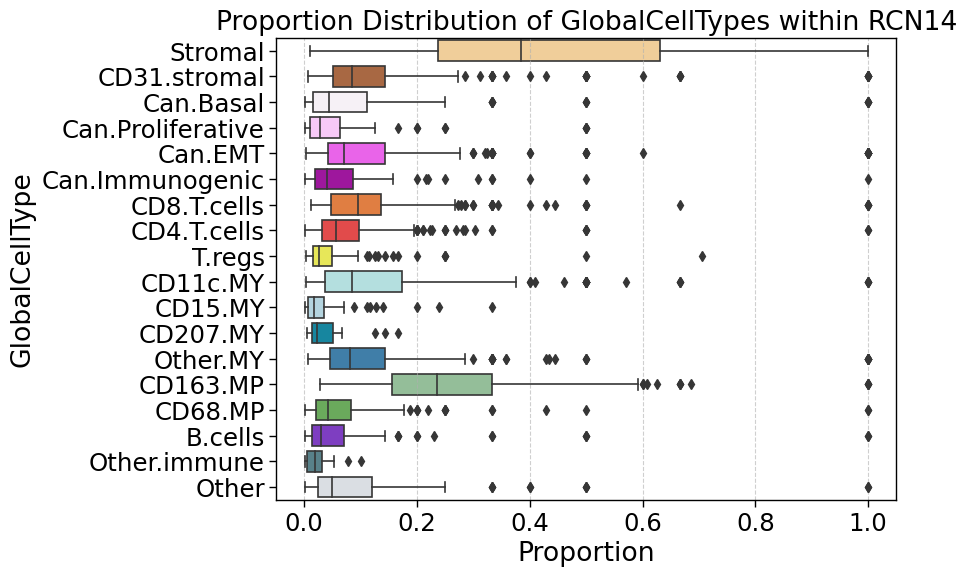

In [39]:
# Group by imageid, rcn_label, and GlobalCellType, then count occurrences
rcns_counts = (
    RCNs_df
    .groupby(['imageid', 'rcn_id', 'GlobalCellType'])
    .size()
    .reset_index(name='count')
)

# Calculate the total counts for each imageid and rcn_label combination
total_counts = rcns_counts.groupby(['imageid', 'rcn_id'])['count'].transform('sum')

# Add a new column for the proportion of each GlobalCellType within each rcn_label and imageid
rcns_counts['proportion'] = rcns_counts['count'] / total_counts

# View the resulting dataframe
print(rcns_counts.head())

plot_cell_distribution(rcns_counts, 'rcn_id')

In [40]:
# Group by imageid, rcn_label, and GlobalCellType, then count occurrences
cancer_rcns_counts = (
    cancer_RCNs_df
    .groupby(['imageid', 'rcn_id', 'GlobalCellType'])
    .size()
    .reset_index(name='count')
)

# Calculate the total counts for each imageid and rcn_label combination
total_counts = cancer_rcns_counts.groupby(['imageid', 'rcn_id'])['count'].transform('sum')

# Add a new column for the proportion of each GlobalCellType within each rcn_label and imageid
cancer_rcns_counts['proportion'] = cancer_rcns_counts['count'] / total_counts

# Group by imageid, rcn_label, and GlobalCellType, then count occurrences
noncancer_rcns_counts = (
    noncancer_RCNs_df
    .groupby(['imageid', 'rcn_id', 'GlobalCellType'])
    .size()
    .reset_index(name='count')
)

# Calculate the total counts for each imageid and rcn_label combination
total_counts = noncancer_rcns_counts.groupby(['imageid', 'rcn_id'])['count'].transform('sum')

# Add a new column for the proportion of each GlobalCellType within each rcn_label and imageid
noncancer_rcns_counts['proportion'] = noncancer_rcns_counts['count'] / total_counts

### Fold change between RCN9 and RCN10

/var/folders/xc/lk995w7563j66dr15k7gw56h0000gp/T/ipykernel_2160/326780450.py:186: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rcn9to10_df = rcn9to10_df.append({'CellType': celltype, 'FoldChange':np.median(rcn9_values)/np.median(rcn10_values), '-Log10Pvalue': -np.log10(p_value)},
/var/folders/xc/lk995w7563j66dr15k7gw56h0000gp/T/ipykernel_2160/326780450.py:189: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rcn10to9_df = rcn10to9_df.append({'CellType': celltype, 'FoldChange':np.log2(np.median(rcn10_values)/np.median(rcn9_values)), '-Log10Pvalue': -np.log10(p_value)},
/var/folders/xc/lk995w7563j66dr15k7gw56h0000gp/T/ipykernel_2160/326780450.py:186: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rcn9to10_df = rcn9to10_df.append

             CellType  FoldChange  -Log10Pvalue
8             Stromal   -1.634201    107.678196
1        CD31.stromal    0.169784      1.816818
13          Can.Basal   -0.489052      7.333013
14  Can.Proliferative    0.326424      2.506518
4             Can.EMT    0.804080     70.901823
5     Can.Immunogenic    1.000000     34.146365
3         CD8.T.cells    1.062339     35.914422
2         CD4.T.cells    1.196366     37.409792
9              T.regs    0.995339     29.688689
10           CD11c.MY    2.044585     70.982202
0             CD15.MY    1.347463     13.811913
12           CD207.MY    1.264882     11.634411
7            Other.MY    0.687005     26.952246
11           CD163.MP    1.041768     24.007868
15            CD68.MP    1.288089     24.307328
16            B.cells    1.679385     27.781691
17       Other.immune    1.872257      6.718037
6               Other    1.140853     21.239235


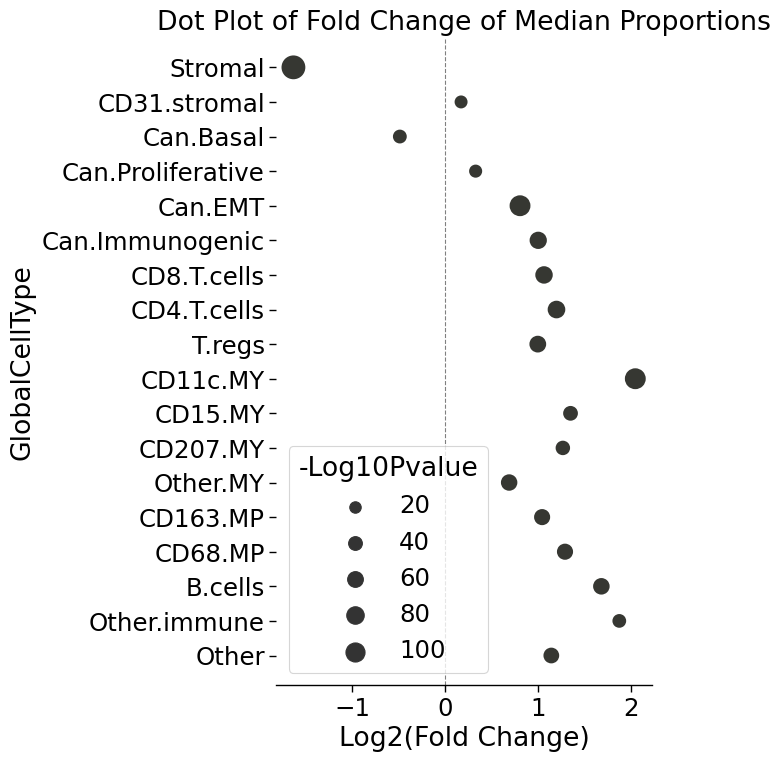

/var/folders/xc/lk995w7563j66dr15k7gw56h0000gp/T/ipykernel_2160/326780450.py:186: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rcn9to10_df = rcn9to10_df.append({'CellType': celltype, 'FoldChange':np.median(rcn9_values)/np.median(rcn10_values), '-Log10Pvalue': -np.log10(p_value)},
/var/folders/xc/lk995w7563j66dr15k7gw56h0000gp/T/ipykernel_2160/326780450.py:189: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rcn10to9_df = rcn10to9_df.append({'CellType': celltype, 'FoldChange':np.log2(np.median(rcn10_values)/np.median(rcn9_values)), '-Log10Pvalue': -np.log10(p_value)},
/var/folders/xc/lk995w7563j66dr15k7gw56h0000gp/T/ipykernel_2160/326780450.py:186: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rcn9to10_df = rcn9to10_df.append

            CellType  FoldChange  -Log10Pvalue
0            Can.EMT    0.477322     33.412652
2          Can.Basal   -0.823192     15.688302
3  Can.Proliferative   -0.029480      0.896952
1    Can.Immunogenic    0.587452     17.753163


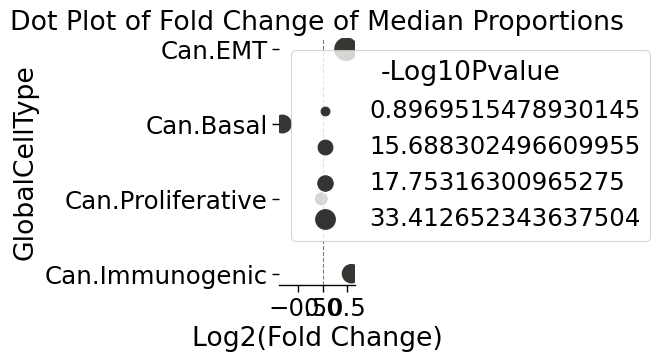

/var/folders/xc/lk995w7563j66dr15k7gw56h0000gp/T/ipykernel_2160/326780450.py:186: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rcn9to10_df = rcn9to10_df.append({'CellType': celltype, 'FoldChange':np.median(rcn9_values)/np.median(rcn10_values), '-Log10Pvalue': -np.log10(p_value)},
/var/folders/xc/lk995w7563j66dr15k7gw56h0000gp/T/ipykernel_2160/326780450.py:189: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rcn10to9_df = rcn10to9_df.append({'CellType': celltype, 'FoldChange':np.log2(np.median(rcn10_values)/np.median(rcn9_values)), '-Log10Pvalue': -np.log10(p_value)},
/var/folders/xc/lk995w7563j66dr15k7gw56h0000gp/T/ipykernel_2160/326780450.py:186: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rcn9to10_df = rcn9to10_df.append

        CellType  FoldChange  -Log10Pvalue
6        Stromal   -1.067601     99.000786
1   CD31.stromal    0.503069     13.411097
3    CD8.T.cells    1.360111     68.552081
2    CD4.T.cells    1.563901     66.189888
7         T.regs    1.385626     53.697922
8       CD11c.MY    2.323641    102.288654
0        CD15.MY    1.802963     20.657996
10      CD207.MY    1.654939     17.685131
5       Other.MY    1.046976     58.967407
9       CD163.MP    1.229529     43.073961
11       CD68.MP    1.576235     36.439432
12       B.cells    2.101504     39.858160
13  Other.immune    2.300321      9.334521
4          Other    1.552989     32.287629


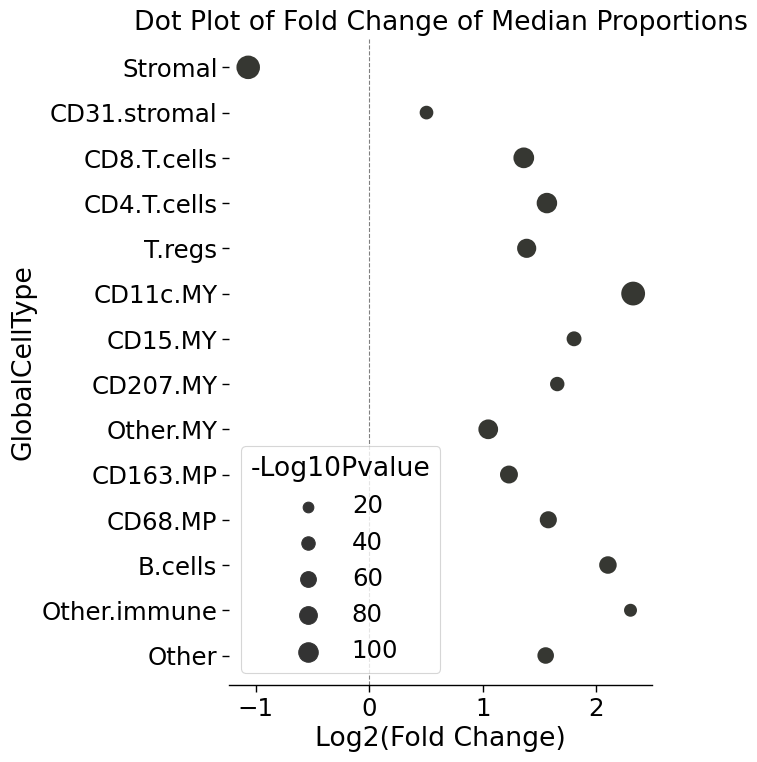

In [41]:
# Create a Categorical type with the desired order based on the celltype_colors keys
ordered_celltypes = list(celltype_colors.keys())
plot_foldchnage_scatter(rcns_counts, ordered_celltypes, filename="/Volumes/h345/afarkkilab/Projects/NKI/RCN_exploration/TSI_RCNs_corecomparison.svg")

plot_foldchnage_scatter(cancer_rcns_counts, ordered_celltypes = ['Can.EMT', 'Can.Basal', 'Can.Proliferative', 'Can.Immunogenic'], filename="/Volumes/h345/afarkkilab/Projects/NKI/RCN_exploration/TSI_RCNs_corecomparison_in_cancer.svg", size = (4, 4))

ordered_noncancer_celltypes = [element for element in ordered_celltypes if not element.startswith('Can.')]
plot_foldchnage_scatter(noncancer_rcns_counts, ordered_celltypes = ordered_noncancer_celltypes, filename="/Volumes/h345/afarkkilab/Projects/NKI/RCN_exploration/TSI_RCNs_corecomparison_in_noncancer.svg")

### Heatmap of median proportion across RCNs 

(2, 14)


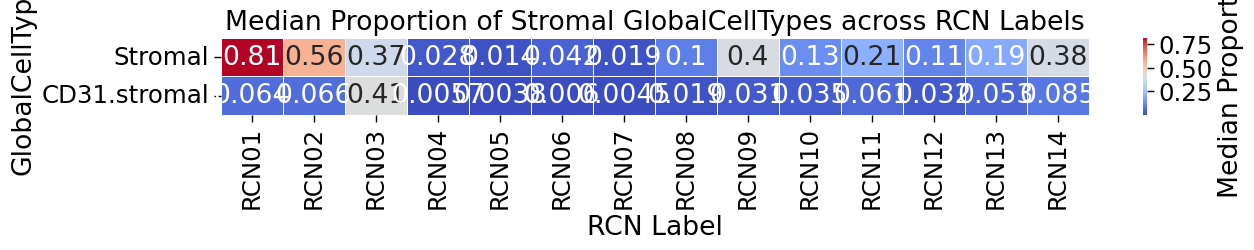

(4, 14)


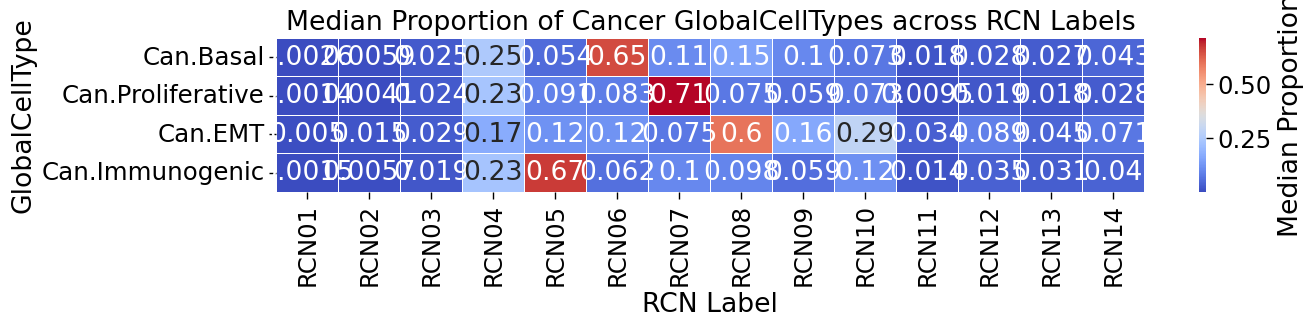

(10, 14)


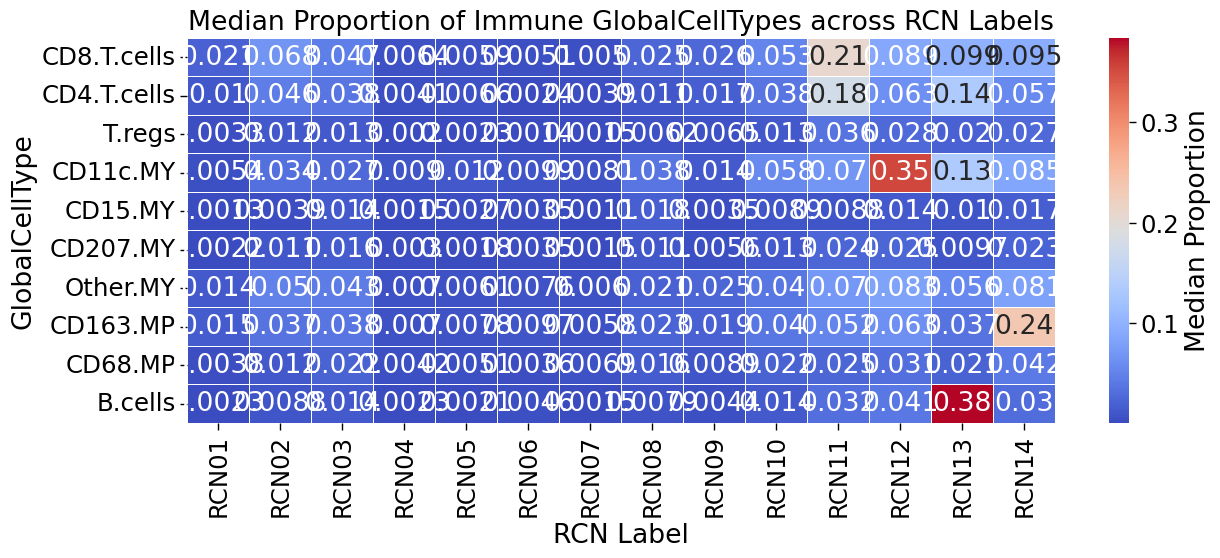

In [42]:
plot_celldist_heatmap(rcns_counts, 'Stromal')
plot_celldist_heatmap(rcns_counts, 'Cancer')
plot_celldist_heatmap(rcns_counts, 'Immune')

### Add clinical labels

In [43]:
# Load the text file into a pandas DataFrame
slides_explanations = pd.read_csv('/Volumes/h345/afarkkilab/Projects/NKI/Clinical_data/All-slides_cycif2samples.txt', sep="	")
# slides_explanations['imageid'] = slides_explanations['cycif.slide'] + '_' + slides_explanations['cycif.core.id']
# slides_explanations.head(5)

# Merge the two data frames on the slide number and core id columns
combined_dataset = pd.merge(RCNs_df, slides_explanations[["cycif.slide","cycif.core.id","patient"]], on=["cycif.slide","cycif.core.id"])
# combined_dataset.head(5)

# Load molecular profile 2
molecular_profiles = pd.read_csv("/Volumes/h345/afarkkilab/Projects/NKI/Tables/Molecular_profiles_patients_20231123.csv")
# molecular_profiles.head(5)
# Prepare therapy sequence
molecular_profiles['therapy_sequence'] = molecular_profiles['therapy_sequence'].replace(to_replace='NACT', value='IDS', regex=True)
molecular_profiles['therapy_sequence'] = molecular_profiles['therapy_sequence'].replace(to_replace='IDS followed by re-debulking', value='IDS', regex=True)
molecular_profiles['therapy_sequence'] = molecular_profiles['therapy_sequence'].replace(to_replace='PDS followed by IDS', value='IDS', regex=True)
molecular_profiles['therapy_sequence'] = molecular_profiles['therapy_sequence'].replace(['Primairy debulking', 'Only debulking'], 'PDS')
    
# Merge the two data frames on patient column
RCNs_df = pd.merge(combined_dataset, molecular_profiles, on=["patient"])
RCNs_df.head(5)

imageid               CellId   X_position  Y_position  \
0  TMA_18_810_core1  TMA_18_810_core1_c1  1078.500000  271.344828   
1  TMA_18_810_core1  TMA_18_810_core1_c2  1050.669014  274.873239   
2  TMA_18_810_core1  TMA_18_810_core1_c3   964.737828  280.842697   
3  TMA_18_810_core1  TMA_18_810_core1_c4  1036.420290  283.555556   
4  TMA_18_810_core1  TMA_18_810_core1_c5  1078.121495  282.752336   

  GlobalCellType cycif.slide cycif.core.id rcn_id rcn_label    patient  \
0        Stromal  TMA_18_810         core1  RCN01   Stromal  T12-05811   
1        Stromal  TMA_18_810         core1  RCN01   Stromal  T12-05811   
2        Can.EMT  TMA_18_810         core1  RCN09       TSI  T12-05811   
3        Stromal  TMA_18_810         core1  RCN01   Stromal  T12-05811   
4        Stromal  TMA_18_810         core1  RCN01   Stromal  T12-05811   

  Molecular.profile2 therapy_sequence  
0              Other              PDS  
1              Other              PDS  
2              Other              PDS  
3              Other              PDS  
4              Other              PDS

### Plot PDS and IDS changes across RCN cell type distribution

[(('RCN01', 'PDS'), ('RCN01', 'IDS')), (('RCN02', 'PDS'), ('RCN02', 'IDS')), (('RCN03', 'PDS'), ('RCN03', 'IDS')), (('RCN04', 'PDS'), ('RCN04', 'IDS')), (('RCN05', 'PDS'), ('RCN05', 'IDS')), (('RCN06', 'PDS'), ('RCN06', 'IDS')), (('RCN07', 'PDS'), ('RCN07', 'IDS')), (('RCN08', 'PDS'), ('RCN08', 'IDS')), (('RCN09', 'PDS'), ('RCN09', 'IDS')), (('RCN10', 'PDS'), ('RCN10', 'IDS')), (('RCN11', 'PDS'), ('RCN11', 'IDS')), (('RCN12', 'PDS'), ('RCN12', 'IDS')), (('RCN13', 'PDS'), ('RCN13', 'IDS')), (('RCN14', 'PDS'), ('RCN14', 'IDS'))]
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

RCN10_PDS vs. RCN10_IDS: Mann-Whitney-Wilcoxon test two-sided, P_val:1.057e-01 U_stat=9.003e+04
RCN11_PDS vs. RCN11_IDS: Mann-Whitney-Wilcoxon test two-sided, P_val:8.021e-01 U_stat=4.947e+04
RCN12_PDS vs. RCN12_IDS: Mann-Whitney-Wilcoxon test two-sided, P_val:4.609e-01 U_st

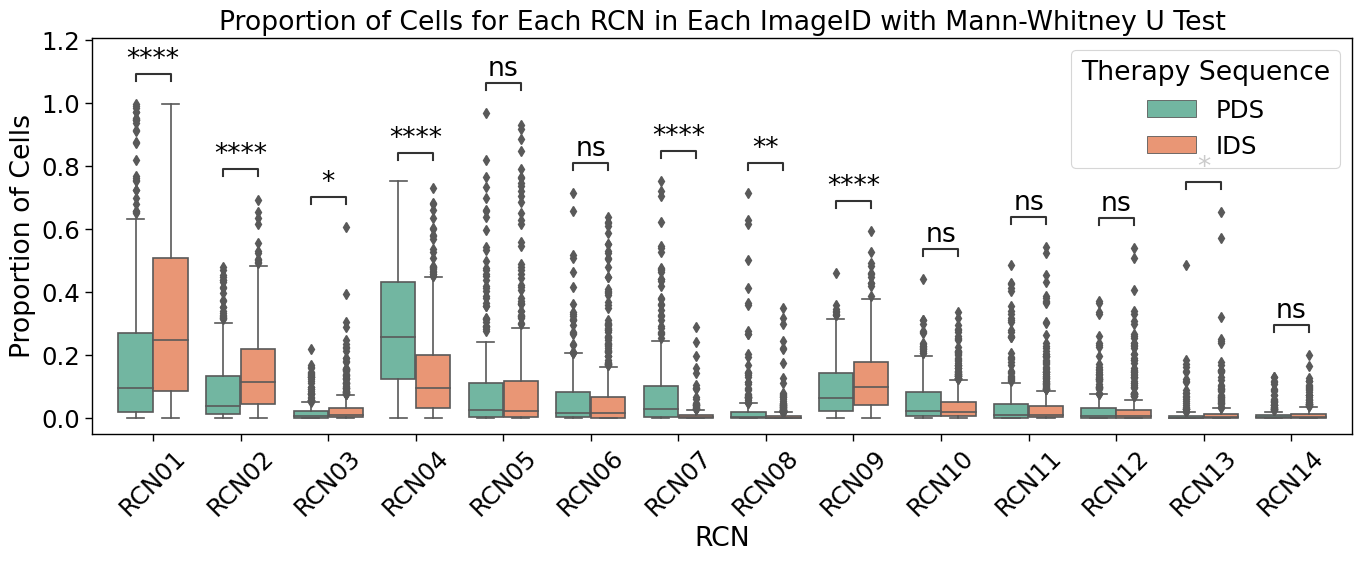

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

# Calculate the proportion of CellId for each RCN within each imageid
df_grouped = (
    RCNs_df.groupby(['imageid', 'rcn_id', 'therapy_sequence'])
    .size()
    .reset_index(name='cell_count')
)

# Calculate total cell count for each imageid
total_counts = RCNs_df.groupby('imageid').size().reset_index(name='total_count')

# Merge to get the total count in the same dataframe
df_grouped = df_grouped.merge(total_counts, on='imageid')

# Calculate the proportion
df_grouped['proportion'] = df_grouped['cell_count'] / df_grouped['total_count']

plot_rcnproportion_boxplot(df_grouped, 'ImageID')


Mann whitney U test:  110395.0 P-value 2.504533572739897e-14
Mann whitney U test:  118821.0 P-value 9.971750111441564e-18
Mann whitney U test:  75757.0 P-value 0.04401821201232034
Mann whitney U test:  41958.0 P-value 1.5334100602654936e-28
Mann whitney U test:  44448.0 P-value 0.6549209482121194
Mann whitney U test:  52177.0 P-value 0.4112685741419362
Mann whitney U test:  17929.5 P-value 3.558786687907237e-21
Mann whitney U test:  36135.5 P-value 0.003982624344681991
Mann whitney U test:  100811.0 P-value 3.1690049767862327e-05
Mann whitney U test:  78919.5 P-value 0.105679678424996
Mann whitney U test:  50644.5 P-value 0.8020978863438041
Mann whitney U test:  49983.5 P-value 0.4609370150664761
Mann whitney U test:  17506.0 P-value 0.018321281537868595
Mann whitney U test:  49661.5 P-value 0.10530532319925473


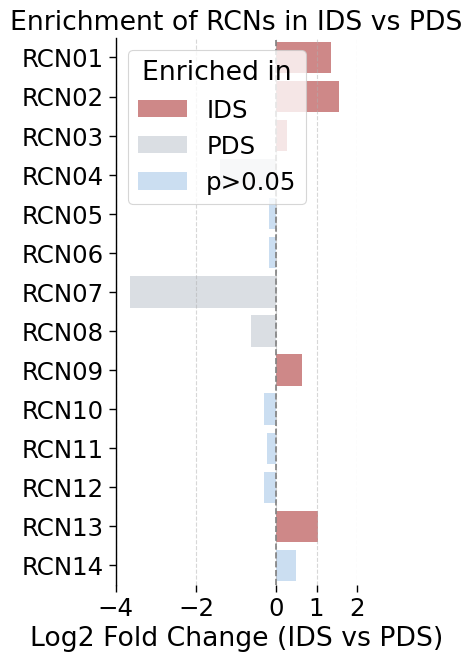

In [45]:
plot_foldchange_inIDSandPDS(df_grouped)

## Patient-level

### Remove patients with less than 5% cancer cells

In [46]:
# Define cancer cell types
cancer_types = ['Can.Basal', 'Can.Proliferative', 'Can.EMT', 'Can.Immunogenic']

# Calculate the total number of cells and the number of cancer cells per patient
total_cells_per_patient = RCNs_df['patient'].value_counts()
cancer_cells_per_patient = RCNs_df[RCNs_df['GlobalCellType'].isin(cancer_types)]['patient'].value_counts()

# Calculate the proportion of cancer cells for each patient
proportion_cancer_cells = cancer_cells_per_patient / total_cells_per_patient

# Filter patients with a cancer cell proportion of at least 5%
patients_to_keep = proportion_cancer_cells[proportion_cancer_cells >= 0.05].index

# Subset the original DataFrame to keep only the selected patients
filtered_df = RCNs_df[RCNs_df['patient'].isin(patients_to_keep)]

# Check the new shape of the filtered DataFrame
print(f"Original DataFrame shape: {RCNs_df.shape}")
print(f"Filtered DataFrame shape: {filtered_df.shape}")


Original DataFrame shape: (4384153, 12)
Filtered DataFrame shape: (4217894, 12)


### Proportions of cells across RCN domains

     patient rcn_label GlobalCellType  count  proportion
0  T08-03800    Cancer        B.cells      2    0.000601
1  T08-03800    Cancer       CD11c.MY      3    0.000901
2  T08-03800    Cancer       CD163.MP     49    0.014724
3  T08-03800    Cancer   CD31.stromal     23    0.006911
4  T08-03800    Cancer    CD4.T.cells     15    0.004507


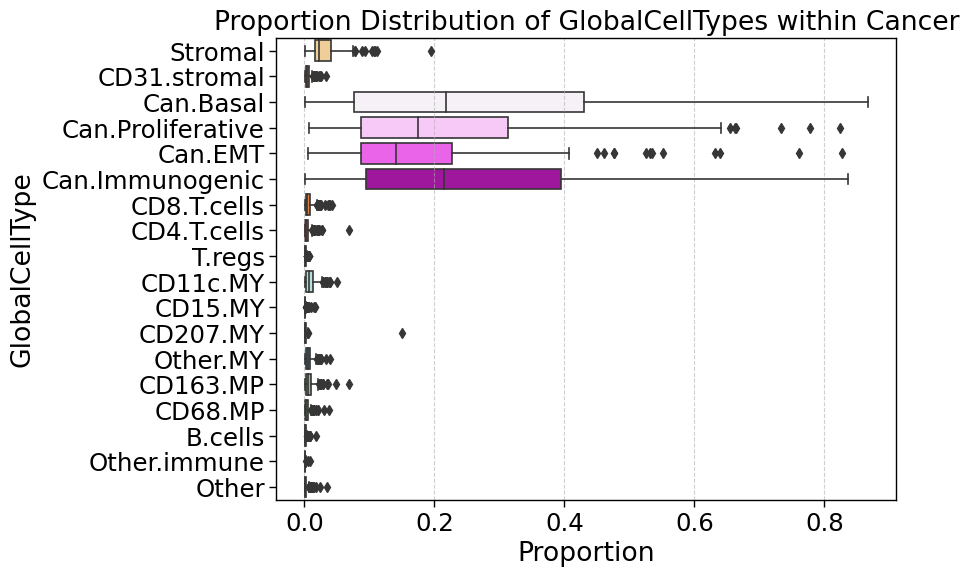

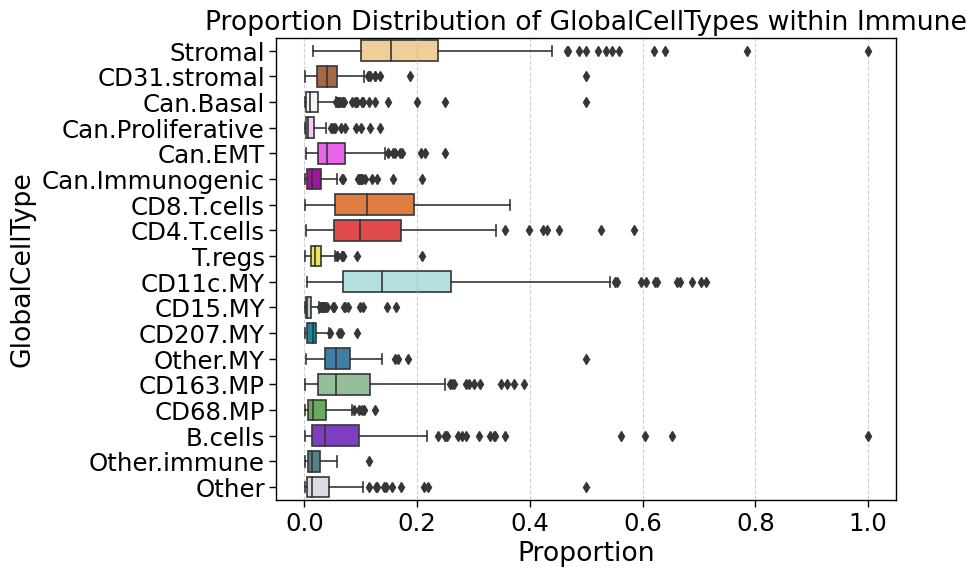

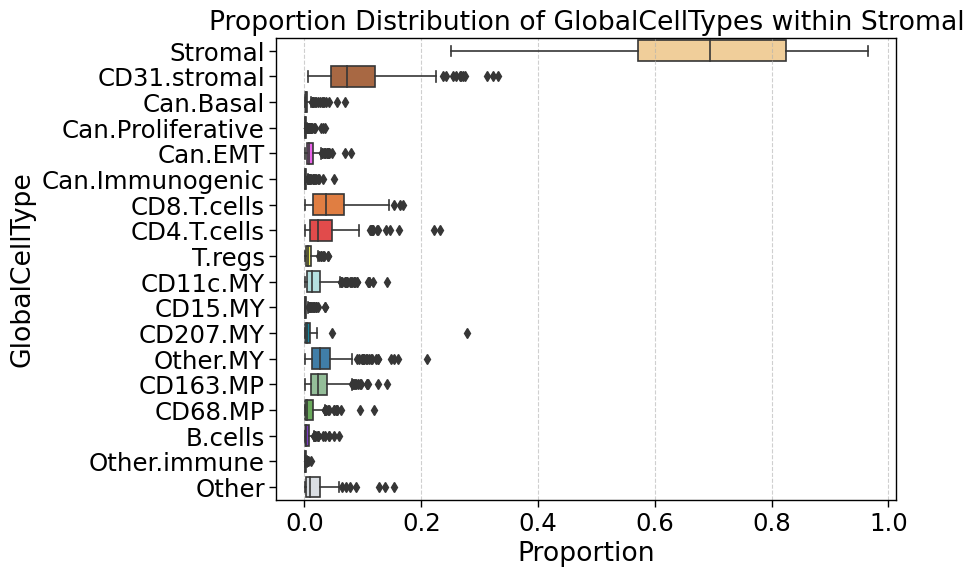

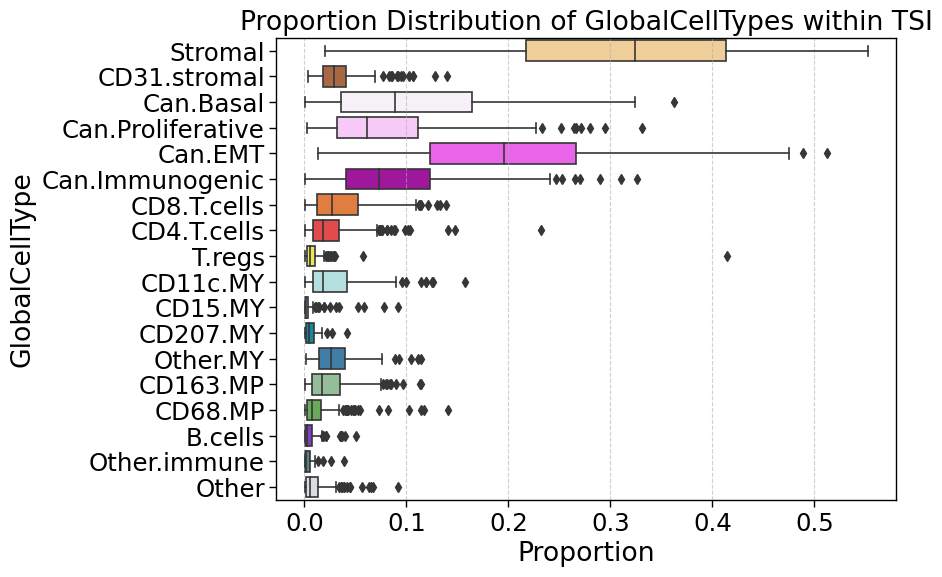

In [47]:
# Group by imageid, rcn_label, and GlobalCellType, then count occurrences
patient_spatdoms_counts = (
    filtered_df
    .groupby(['patient', 'rcn_label', 'GlobalCellType'])
    .size()
    .reset_index(name='count')
)

# Calculate the total counts for each patient and rcn_label combination
total_counts = patient_spatdoms_counts.groupby(['patient', 'rcn_label'])['count'].transform('sum')

# Add a new column for the proportion of each GlobalCellType within each rcn_label and imageid
patient_spatdoms_counts['proportion'] = patient_spatdoms_counts['count'] / total_counts

# View the resulting dataframe
print(patient_spatdoms_counts.head())

plot_cell_distribution(patient_spatdoms_counts, 'rcn_label')

### Proportions of cells across RCNs

In [48]:
cancer_RCNs_df = filtered_df.loc[filtered_df['GlobalCellType'].isin(['Can.EMT', 'Can.Basal', 'Can.Proliferative', 'Can.Immunogenic'])]
noncancer_RCNs_df = filtered_df.loc[~filtered_df['GlobalCellType'].isin(['Can.EMT', 'Can.Basal', 'Can.Proliferative', 'Can.Immunogenic'])]

     patient rcn_id GlobalCellType  count  proportion
0  T08-03800  RCN01        B.cells     21    0.001261
1  T08-03800  RCN01       CD11c.MY      2    0.000120
2  T08-03800  RCN01        CD15.MY      3    0.000180
3  T08-03800  RCN01       CD163.MP     44    0.002643
4  T08-03800  RCN01       CD207.MY      5    0.000300


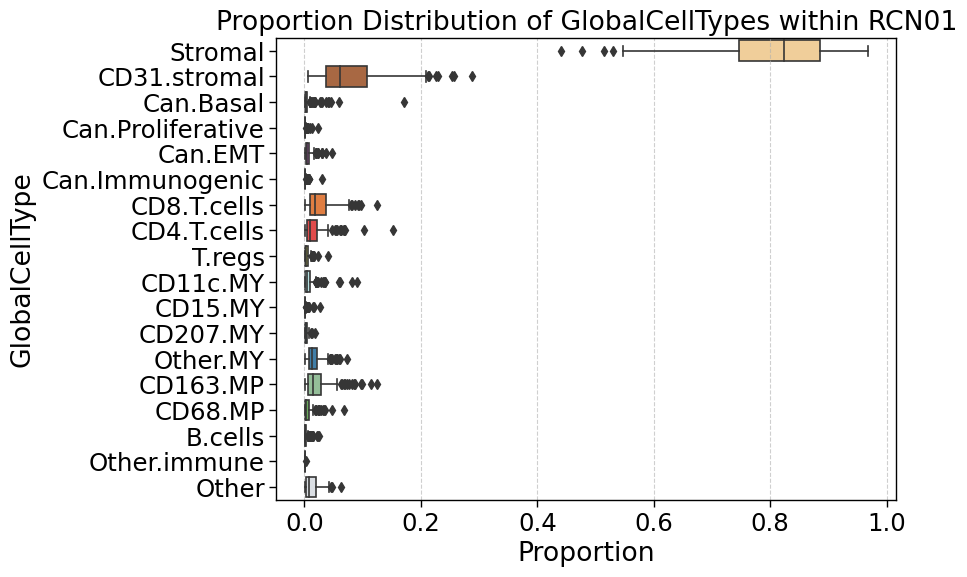

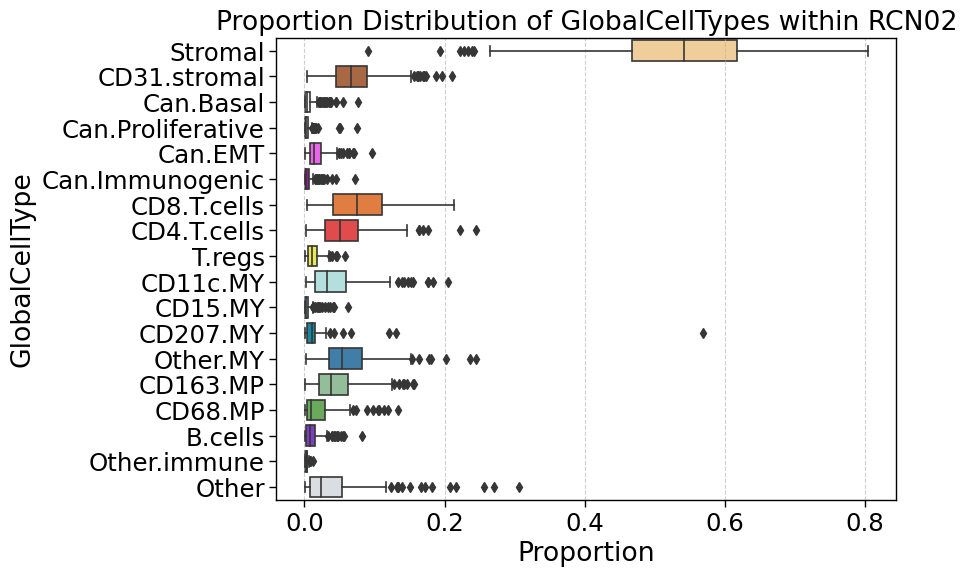

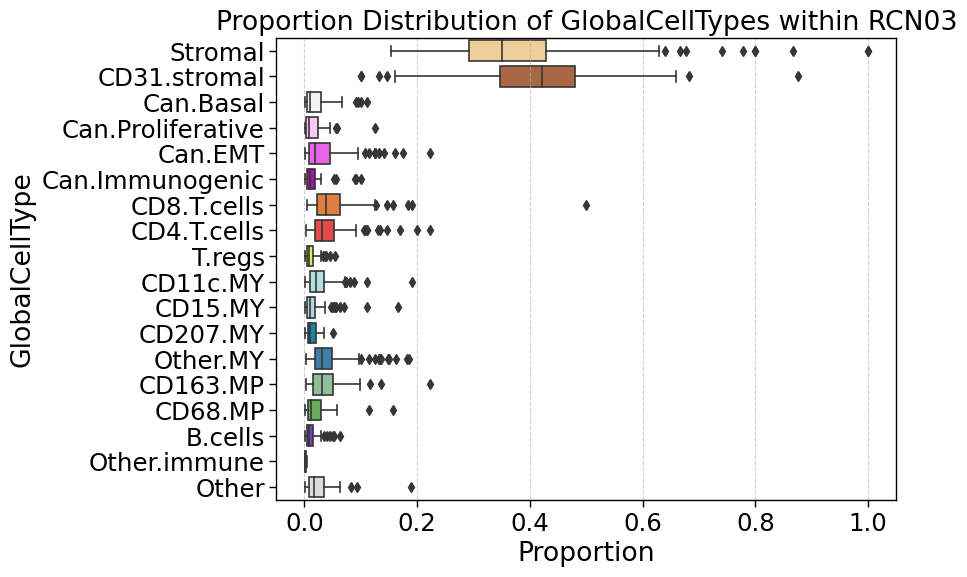

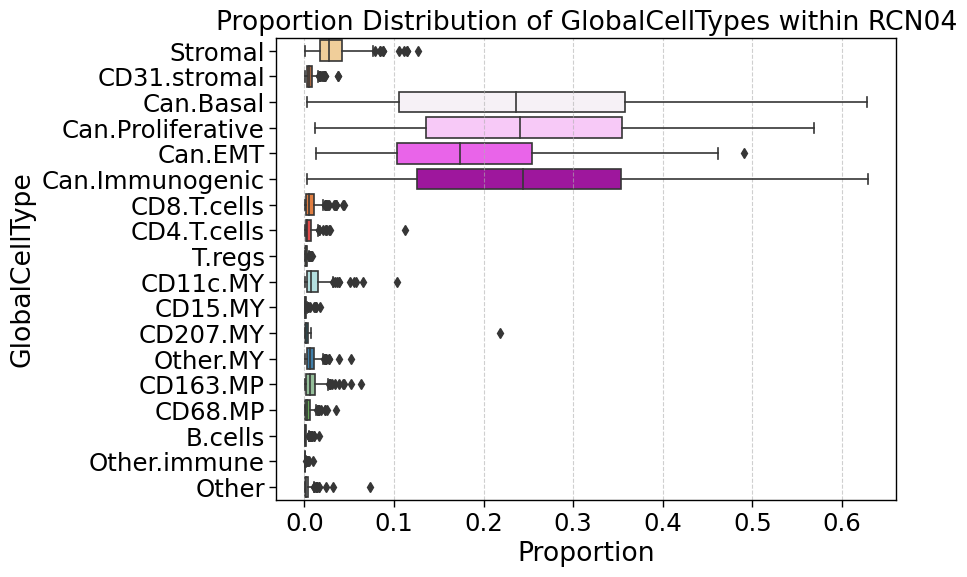

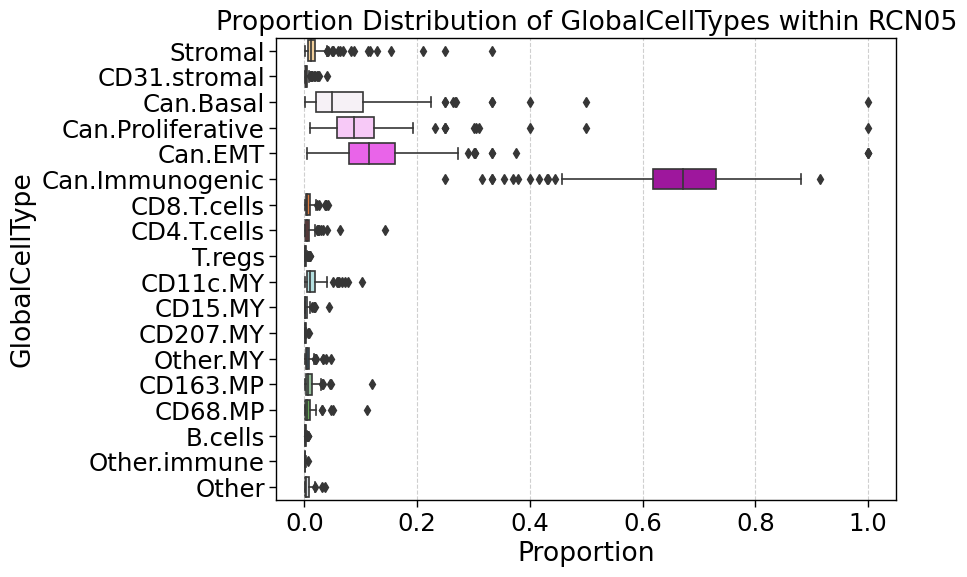

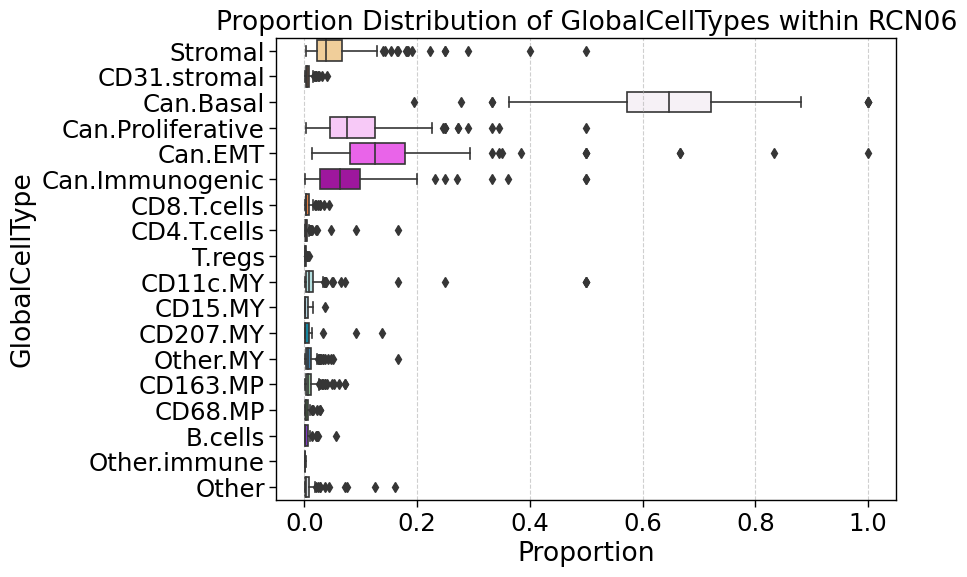

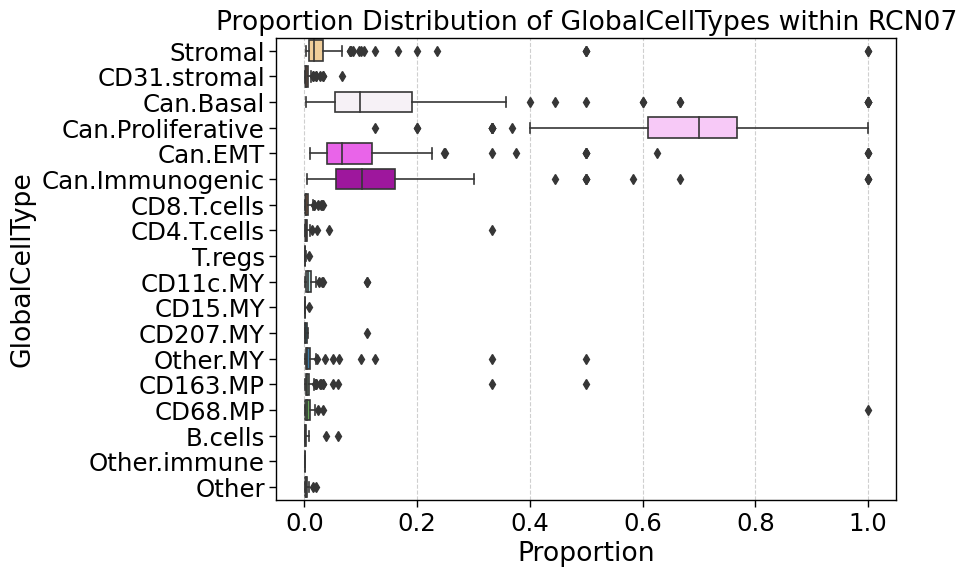

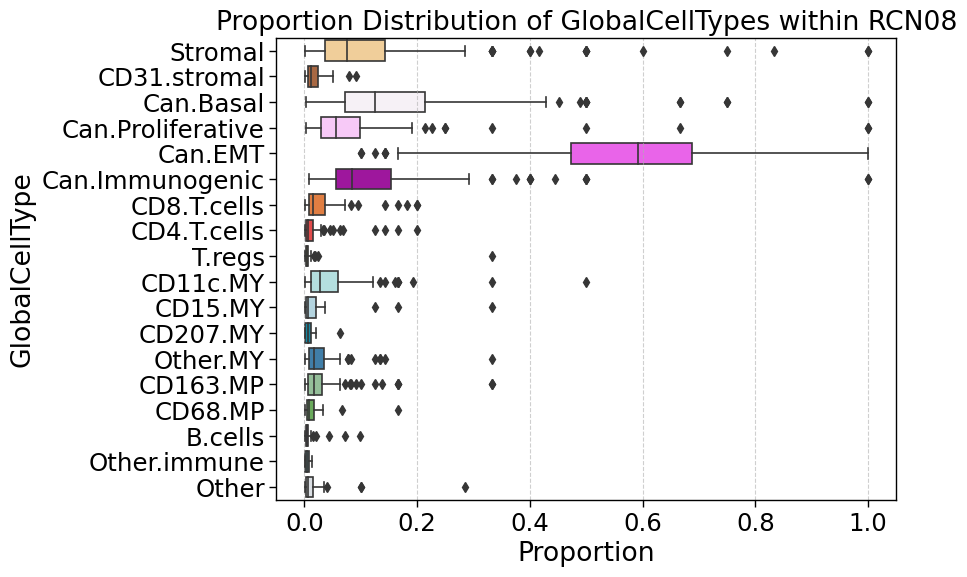

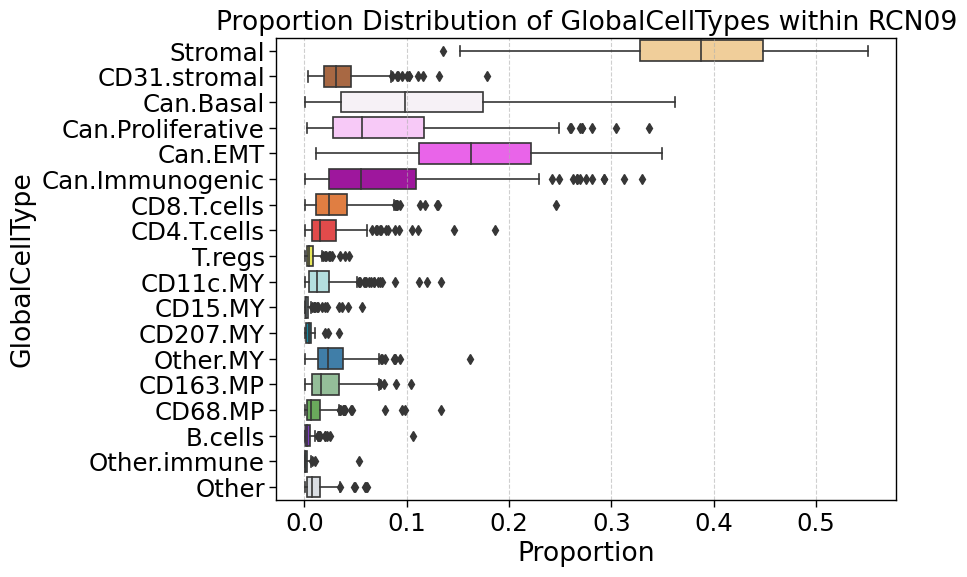

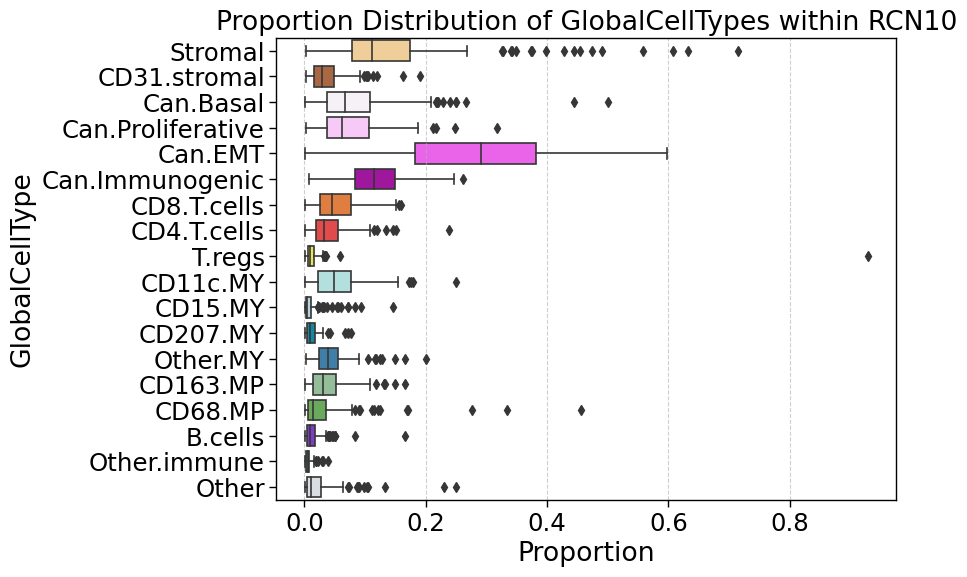

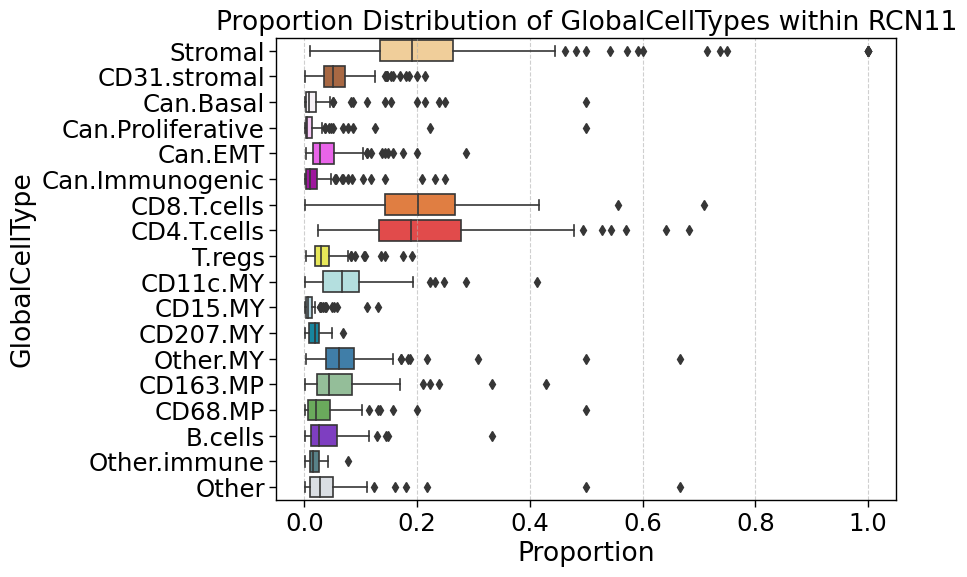

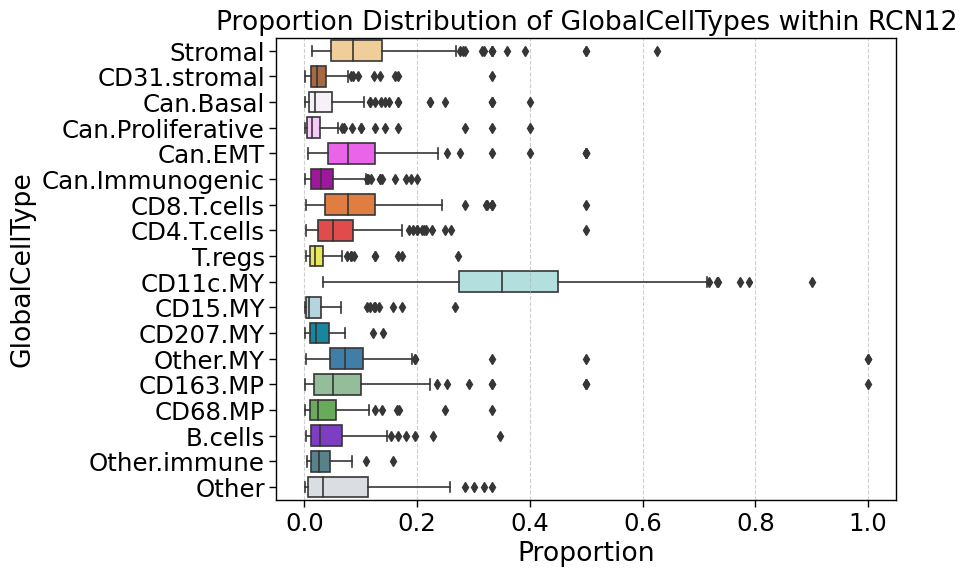

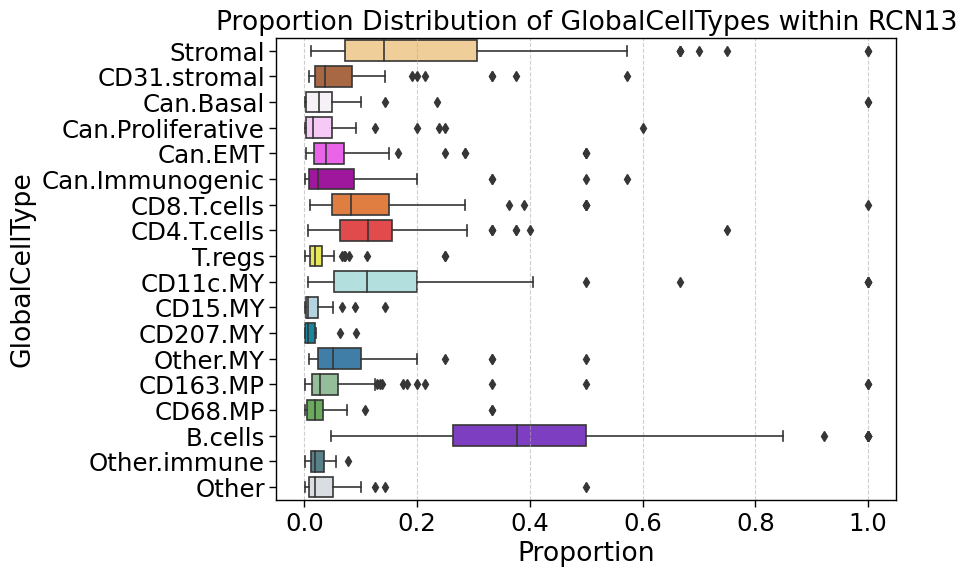

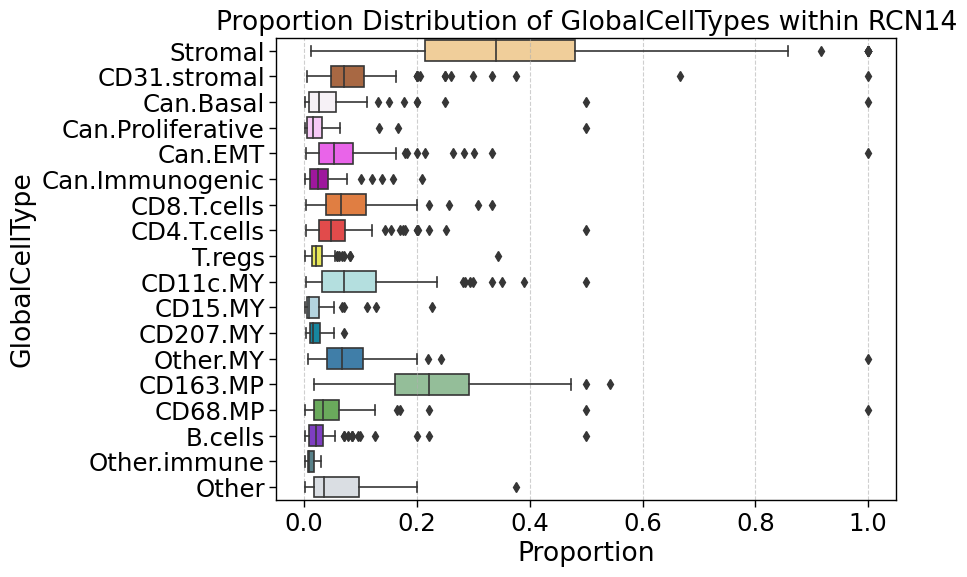

In [49]:
# Group by imageid, rcn_label, and GlobalCellType, then count occurrences
patient_rcns_counts = (
    filtered_df
    .groupby(['patient', 'rcn_id', 'GlobalCellType'])
    .size()
    .reset_index(name='count')
)

# Calculate the total counts for each imageid and rcn_label combination
total_counts = patient_rcns_counts.groupby(['patient', 'rcn_id'])['count'].transform('sum')

# Add a new column for the proportion of each GlobalCellType within each rcn_label and imageid
patient_rcns_counts['proportion'] = patient_rcns_counts['count'] / total_counts

# View the resulting dataframe
print(patient_rcns_counts.head())

plot_cell_distribution(patient_rcns_counts, 'rcn_id')

In [50]:
# Group by imageid, rcn_label, and GlobalCellType, then count occurrences
cancer_patient_rcns_counts = (
    cancer_RCNs_df
    .groupby(['patient', 'rcn_id', 'GlobalCellType'])
    .size()
    .reset_index(name='count')
)

# Calculate the total counts for each imageid and rcn_label combination
total_counts = cancer_patient_rcns_counts.groupby(['patient', 'rcn_id'])['count'].transform('sum')

# Add a new column for the proportion of each GlobalCellType within each rcn_label and imageid
cancer_patient_rcns_counts['proportion'] = cancer_patient_rcns_counts['count'] / total_counts

# Group by imageid, rcn_label, and GlobalCellType, then count occurrences
noncancer_patient_rcns_counts = (
    noncancer_RCNs_df
    .groupby(['patient', 'rcn_id', 'GlobalCellType'])
    .size()
    .reset_index(name='count')
)

# Calculate the total counts for each imageid and rcn_label combination
total_counts = noncancer_patient_rcns_counts.groupby(['patient', 'rcn_id'])['count'].transform('sum')

# Add a new column for the proportion of each GlobalCellType within each rcn_label and imageid
noncancer_patient_rcns_counts['proportion'] = noncancer_patient_rcns_counts['count'] / total_counts

In [51]:
print(noncancer_patient_rcns_counts)

         patient rcn_id GlobalCellType  count  proportion
0      T08-03800  RCN01        B.cells     21    0.001264
1      T08-03800  RCN01       CD11c.MY      2    0.000120
2      T08-03800  RCN01        CD15.MY      3    0.000181
3      T08-03800  RCN01       CD163.MP     44    0.002649
4      T08-03800  RCN01       CD207.MY      5    0.000301
...          ...    ...            ...    ...         ...
23589  T17-61216  RCN12   CD31.stromal      1    0.025641
23590  T17-61216  RCN13        B.cells      2    1.000000
23591  T17-61216  RCN14       CD163.MP      1    0.250000
23592  T17-61216  RCN14   CD31.stromal      1    0.250000
23593  T17-61216  RCN14        Stromal      2    0.500000

[23594 rows x 5 columns]


### Fold change between RCN9 and RCN10

In [52]:
### Remove patients with few cells for TSI RCNs

In [53]:
filtered_patients = []

for rcn in ['RCN09','RCN10']:
    
    rcn_df = filtered_df[filtered_df['rcn_id']==rcn]
    
    counts_df = rcn_df['patient'].value_counts().reset_index()
    counts_df.columns = ['patient', 'count']
    
    # Compute 1st and 99th percentiles
    low_threshold = 100
    high_threshold = counts_df['count'].quantile(0.99)
    
    # Find patients to remove
    patients_to_remove = counts_df[
        (counts_df['count'] < low_threshold) | 
        (counts_df['count'] > high_threshold)
    ]['patient'].tolist()
    
    filtered_patients.extend(patients_to_remove)

# Remove duplicates from the final list
filtered_patients = list(set(filtered_patients))
print(filtered_patients)

print(len(filtered_df['patient'].unique()))
tsi_filtered_df = filtered_df[~filtered_df['patient'].isin(filtered_patients)]
print(len(tsi_filtered_df['patient'].unique()))


['T15-01390', 'T15-05904', 'T14-04805', 'T08-05863', 'T11-01287', 'T17-61076', 'T17-61158', 'T15-08222', 'T10-11370', 'T17-61069', 'T17-61001', 'T15-01120', 'T08-09400', 'T17-61071', 'T13-06809', 'T17-61159', 'T08-06732', 'T11-07732', 'T15-03851', 'T17-61210', 'T17-61144', 'T17-61154', 'T17-61153', 'T11-01730', 'T17-61086', 'T12-06984', 'T10-04867', 'T13-06886', 'T14-04551', 'T13-06122', 'T14-07035', 'T17-61145', 'T10-09951', 'T10-04936', 'T17-61082', 'T14-03217', 'T09-06052', 'T08-05713', 'T11-02711', 'T17-61216', 'T17-61087', 'T17-60990', 'T17-61199']
223
180


In [54]:
# Group by imageid, rcn_label, and GlobalCellType, then count occurrences
tsi_patient_rcns_counts = (
    tsi_filtered_df
    .groupby(['patient', 'rcn_id', 'GlobalCellType'])
    .size()
    .reset_index(name='count')
)

# Calculate the total counts for each imageid and rcn_label combination
total_counts = tsi_patient_rcns_counts.groupby(['patient', 'rcn_id'])['count'].transform('sum')

# Add a new column for the proportion of each GlobalCellType within each rcn_label and imageid
tsi_patient_rcns_counts['proportion'] = tsi_patient_rcns_counts['count'] / total_counts

# View the resulting dataframe
print(tsi_patient_rcns_counts.head())

     patient rcn_id GlobalCellType  count  proportion
0  T08-03800  RCN01        B.cells     21    0.001261
1  T08-03800  RCN01       CD11c.MY      2    0.000120
2  T08-03800  RCN01        CD15.MY      3    0.000180
3  T08-03800  RCN01       CD163.MP     44    0.002643
4  T08-03800  RCN01       CD207.MY      5    0.000300


In [55]:
filtered_patients = []

for rcn in ['RCN09','RCN10']:
    
    rcn_df = cancer_RCNs_df[cancer_RCNs_df['rcn_id']==rcn]
    
    counts_df = rcn_df['patient'].value_counts().reset_index()
    counts_df.columns = ['patient', 'count']
    
    # Compute 1st and 99th percentiles
    low_threshold = 100
    high_threshold = counts_df['count'].quantile(0.99)
    
    # Find patients to remove
    patients_to_remove = counts_df[
        (counts_df['count'] < low_threshold) | 
        (counts_df['count'] > high_threshold)
    ]['patient'].tolist()
    
    filtered_patients.extend(patients_to_remove)

# Remove duplicates from the final list
filtered_patients = list(set(filtered_patients))
print(filtered_patients)

print(len(filtered_df['patient'].unique()))
tsi_cancer_RCNs_df = cancer_RCNs_df[~cancer_RCNs_df['patient'].isin(filtered_patients)]
print(len(tsi_cancer_RCNs_df['patient'].unique()))


filtered_patients = []

for rcn in ['RCN09','RCN10']:
    
    rcn_df = noncancer_RCNs_df[noncancer_RCNs_df['rcn_id']==rcn]
    
    counts_df = rcn_df['patient'].value_counts().reset_index()
    counts_df.columns = ['patient', 'count']
    
    # Compute 1st and 99th percentiles
    low_threshold = 50
    high_threshold = counts_df['count'].quantile(0.99)
    
    # counts_df.hist()
    
    # Find patients to remove
    patients_to_remove = counts_df[
        (counts_df['count'] < low_threshold) | 
        (counts_df['count'] > high_threshold)
    ]['patient'].tolist()
    
    filtered_patients.extend(patients_to_remove)

# Remove duplicates from the final list
filtered_patients = list(set(filtered_patients))
print(filtered_patients)

print(len(filtered_df['patient'].unique()))
tsi_noncancer_RCNs_df = noncancer_RCNs_df[~noncancer_RCNs_df['patient'].isin(filtered_patients)]
print(len(tsi_noncancer_RCNs_df['patient'].unique()))

['T17-61187', 'T15-01390', 'T15-05904', 'T11-03079', 'T14-04805', 'T08-05863', 'T11-01287', 'T17-61076', 'T15-06488', 'T13-04724', 'T17-61158', 'T15-08222', 'T10-11370', 'T17-61069', 'T17-61001', 'T15-05371', 'T17-61097', 'T11-11535', 'T15-01120', 'T14-07272', 'T08-09400', 'T17-61071', 'T17-61159', 'T13-06809', 'T08-06732', 'T17-61171', 'T12-11335', 'T17-61190', 'T11-07732', 'T13-05762', 'T14-04654', 'T17-61194', 'T15-03851', 'T17-61210', 'T10-06224', 'T13-08331', 'T15-02253', 'T17-61144', 'T17-61154', 'T10-03884', 'T17-61153', 'T11-01730', 'T17-61086', 'T17-61093', 'T11-05162', 'T12-06984', 'T12-01978', 'T13-06886', 'T14-04551', 'T10-04867', 'T13-06122', 'T14-07035', 'T15-05197', 'T17-61148', 'T17-61145', 'T10-09951', 'T11-11158', 'T17-61173', 'T10-04936', 'T17-61082', 'T14-03217', 'T08-06460', 'T08-05713', 'T17-61155', 'T12-11220', 'T10-05777', 'T17-61195', 'T12-05100', 'T11-02711', 'T09-06052', 'T17-61216', 'T17-61087', 'T17-60990', 'T11-08703', 'T17-61068', 'T17-61199']
223
147
['T

In [56]:
# Group by imageid, rcn_label, and GlobalCellType, then count occurrences
tsi_cancer_patient_rcns_counts = (
    tsi_cancer_RCNs_df
    .groupby(['patient', 'rcn_id', 'GlobalCellType'])
    .size()
    .reset_index(name='count')
)

# Calculate the total counts for each imageid and rcn_label combination
total_counts = tsi_cancer_patient_rcns_counts.groupby(['patient', 'rcn_id'])['count'].transform('sum')

# Add a new column for the proportion of each GlobalCellType within each rcn_label and imageid
tsi_cancer_patient_rcns_counts['proportion'] = tsi_cancer_patient_rcns_counts['count'] / total_counts

# Group by imageid, rcn_label, and GlobalCellType, then count occurrences
tsi_noncancer_patient_rcns_counts = (
    tsi_noncancer_RCNs_df
    .groupby(['patient', 'rcn_id', 'GlobalCellType'])
    .size()
    .reset_index(name='count')
)

# Calculate the total counts for each imageid and rcn_label combination
total_counts = tsi_noncancer_patient_rcns_counts.groupby(['patient', 'rcn_id'])['count'].transform('sum')

# Add a new column for the proportion of each GlobalCellType within each rcn_label and imageid
tsi_noncancer_patient_rcns_counts['proportion'] = tsi_noncancer_patient_rcns_counts['count'] / total_counts

/var/folders/xc/lk995w7563j66dr15k7gw56h0000gp/T/ipykernel_2160/326780450.py:186: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rcn9to10_df = rcn9to10_df.append({'CellType': celltype, 'FoldChange':np.median(rcn9_values)/np.median(rcn10_values), '-Log10Pvalue': -np.log10(p_value)},
/var/folders/xc/lk995w7563j66dr15k7gw56h0000gp/T/ipykernel_2160/326780450.py:189: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rcn10to9_df = rcn10to9_df.append({'CellType': celltype, 'FoldChange':np.log2(np.median(rcn10_values)/np.median(rcn9_values)), '-Log10Pvalue': -np.log10(p_value)},
/var/folders/xc/lk995w7563j66dr15k7gw56h0000gp/T/ipykernel_2160/326780450.py:186: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rcn9to10_df = rcn9to10_df.append

             CellType  FoldChange  -Log10Pvalue
14            Stromal   -1.804912     51.811441
5        CD31.stromal   -0.106442      0.652884
9           Can.Basal   -0.447564      2.951485
16  Can.Proliferative    0.191002      0.585705
10            Can.EMT    0.827354     22.431399
11    Can.Immunogenic    1.005103     10.821231
8         CD8.T.cells    0.869104      7.493800
6         CD4.T.cells    0.888244      7.427364
15             T.regs    0.740811      9.001368
1            CD11c.MY    1.673322     18.483359
2             CD15.MY    1.521937      8.983897
4            CD207.MY    0.930293      3.813462
13           Other.MY    0.560955      5.927887
3            CD163.MP    0.478851      2.910173
7             CD68.MP    1.003739      5.282053
0             B.cells    1.717627     12.690238
17       Other.immune    2.486367      6.229217
12              Other   -0.079737      0.578839


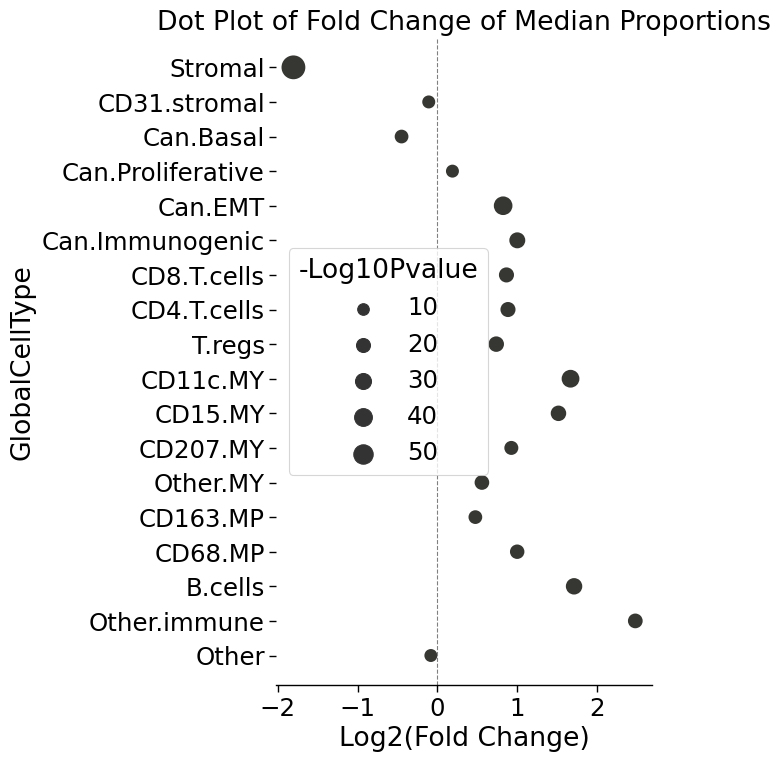

/var/folders/xc/lk995w7563j66dr15k7gw56h0000gp/T/ipykernel_2160/326780450.py:186: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rcn9to10_df = rcn9to10_df.append({'CellType': celltype, 'FoldChange':np.median(rcn9_values)/np.median(rcn10_values), '-Log10Pvalue': -np.log10(p_value)},
/var/folders/xc/lk995w7563j66dr15k7gw56h0000gp/T/ipykernel_2160/326780450.py:189: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rcn10to9_df = rcn10to9_df.append({'CellType': celltype, 'FoldChange':np.log2(np.median(rcn10_values)/np.median(rcn9_values)), '-Log10Pvalue': -np.log10(p_value)},
/var/folders/xc/lk995w7563j66dr15k7gw56h0000gp/T/ipykernel_2160/326780450.py:186: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rcn9to10_df = rcn9to10_df.append

            CellType  FoldChange  -Log10Pvalue
1            Can.EMT    0.380372      9.148699
0          Can.Basal   -0.769933      5.186921
3  Can.Proliferative    0.007461      0.779255
2    Can.Immunogenic    0.563114      3.751997


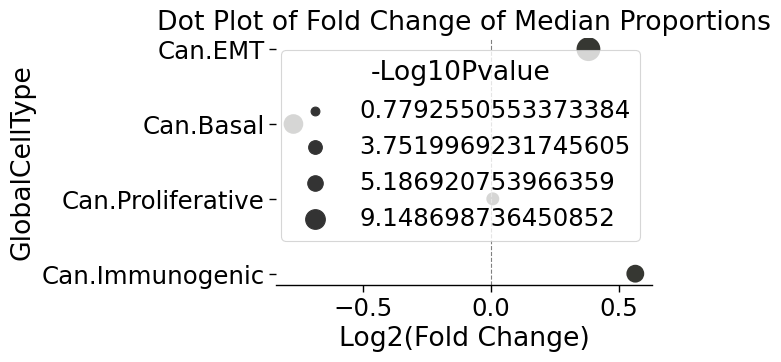

/var/folders/xc/lk995w7563j66dr15k7gw56h0000gp/T/ipykernel_2160/326780450.py:186: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rcn9to10_df = rcn9to10_df.append({'CellType': celltype, 'FoldChange':np.median(rcn9_values)/np.median(rcn10_values), '-Log10Pvalue': -np.log10(p_value)},
/var/folders/xc/lk995w7563j66dr15k7gw56h0000gp/T/ipykernel_2160/326780450.py:189: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rcn10to9_df = rcn10to9_df.append({'CellType': celltype, 'FoldChange':np.log2(np.median(rcn10_values)/np.median(rcn9_values)), '-Log10Pvalue': -np.log10(p_value)},
/var/folders/xc/lk995w7563j66dr15k7gw56h0000gp/T/ipykernel_2160/326780450.py:186: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rcn9to10_df = rcn9to10_df.append

        CellType  FoldChange  -Log10Pvalue
11       Stromal   -1.318187     45.041677
5   CD31.stromal    0.210769      1.591870
8    CD8.T.cells    1.193172     16.267039
6    CD4.T.cells    1.316276     15.808821
12        T.regs    1.044760     17.943232
1       CD11c.MY    2.053832     28.218659
2        CD15.MY    1.843258     12.982150
4       CD207.MY    1.430911      5.145630
10      Other.MY    0.858299     15.416085
3       CD163.MP    1.014281      8.994381
7        CD68.MP    1.510509      8.501775
0        B.cells    2.024372     18.339510
13  Other.immune    2.844219      8.032187
9          Other    0.541612      1.912182


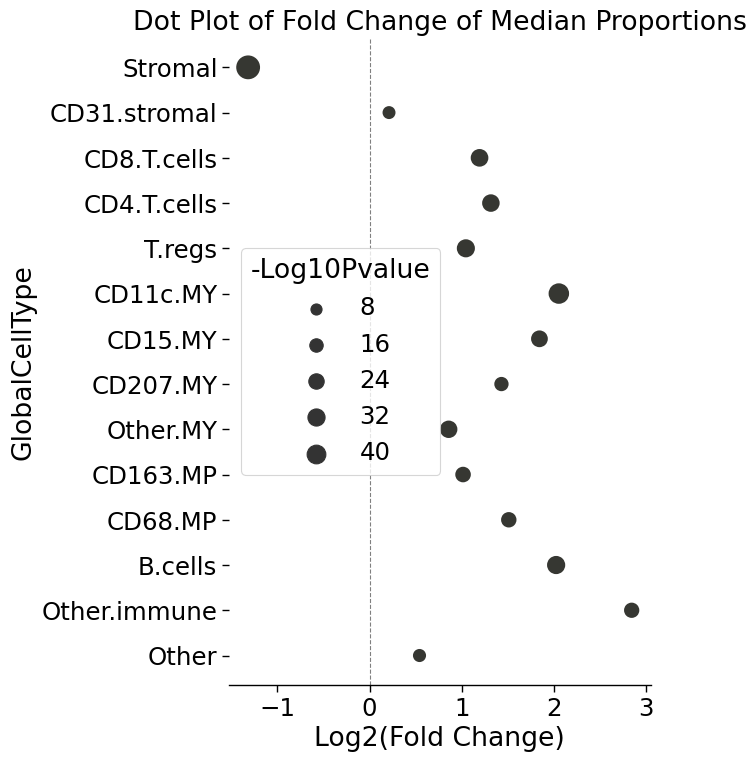

In [57]:
# Create a Categorical type with the desired order based on the celltype_colors keys
ordered_celltypes = list(celltype_colors.keys())
plot_foldchnage_scatter(tsi_patient_rcns_counts, ordered_celltypes, filename="/Volumes/h345/afarkkilab/Projects/NKI/RCN_exploration/TSI_RCNs_patientcomparison.svg")

plot_foldchnage_scatter(tsi_cancer_patient_rcns_counts, ordered_celltypes = ['Can.EMT', 'Can.Basal', 'Can.Proliferative', 'Can.Immunogenic'], filename="/Volumes/h345/afarkkilab/Projects/NKI/RCN_exploration/TSI_RCNs_patientcomparison_in_cancer.svg", size = (7, 4))

ordered_noncancer_celltypes = [element for element in ordered_celltypes if not element.startswith('Can.')]
plot_foldchnage_scatter(tsi_noncancer_patient_rcns_counts, ordered_celltypes = ordered_noncancer_celltypes, filename="/Volumes/h345/afarkkilab/Projects/NKI/RCN_exploration/TSI_RCNs_patientcomparison_in_noncancer.svg")

### Heatmap of median proportion across RCNs 

(2, 14)


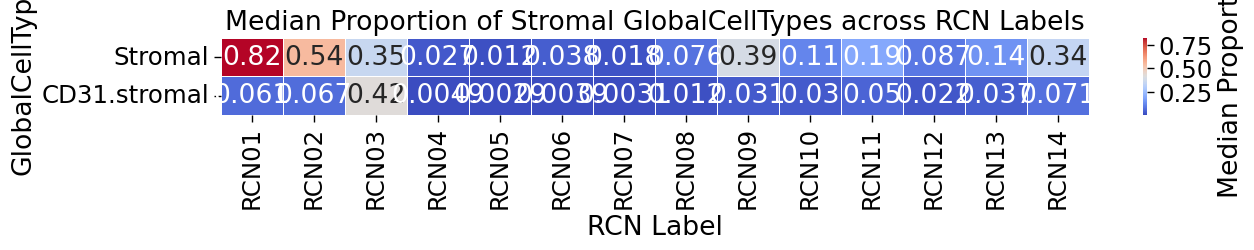

(4, 14)


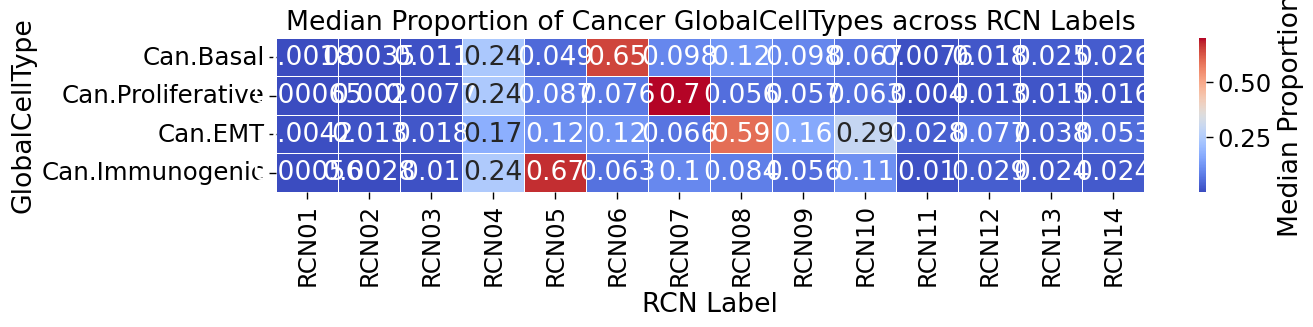

(10, 14)


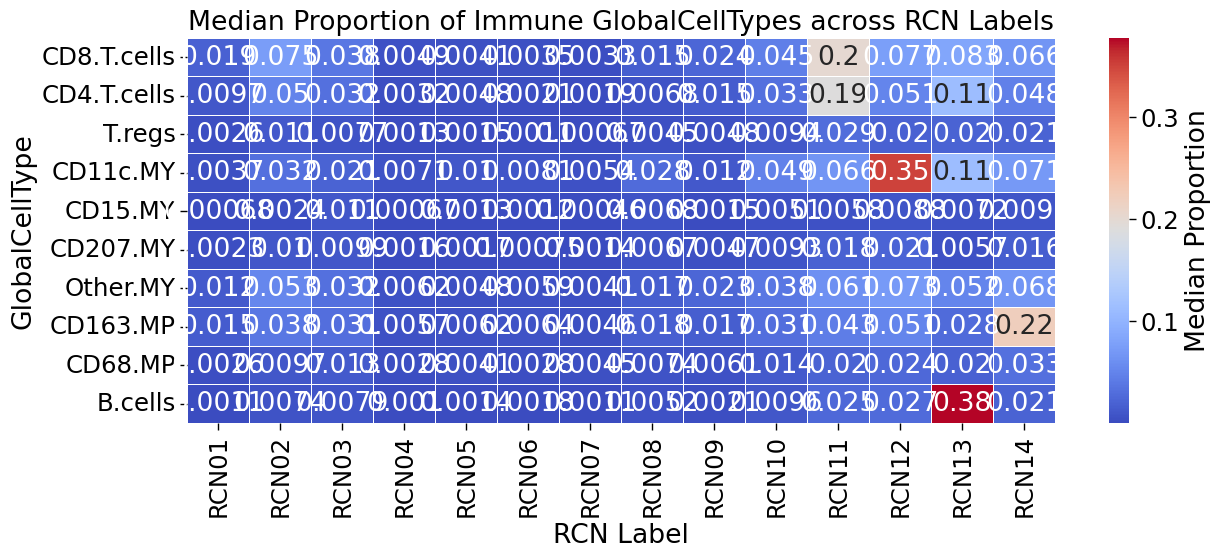

In [58]:
plot_celldist_heatmap(patient_rcns_counts, 'Stromal')
plot_celldist_heatmap(patient_rcns_counts, 'Cancer')
plot_celldist_heatmap(patient_rcns_counts, 'Immune')

### Plot PDS and IDS changes across RCN cell type distribution

[(('RCN01', 'PDS'), ('RCN01', 'IDS')), (('RCN02', 'PDS'), ('RCN02', 'IDS')), (('RCN03', 'PDS'), ('RCN03', 'IDS')), (('RCN04', 'PDS'), ('RCN04', 'IDS')), (('RCN05', 'PDS'), ('RCN05', 'IDS')), (('RCN06', 'PDS'), ('RCN06', 'IDS')), (('RCN07', 'PDS'), ('RCN07', 'IDS')), (('RCN08', 'PDS'), ('RCN08', 'IDS')), (('RCN09', 'PDS'), ('RCN09', 'IDS')), (('RCN10', 'PDS'), ('RCN10', 'IDS')), (('RCN11', 'PDS'), ('RCN11', 'IDS')), (('RCN12', 'PDS'), ('RCN12', 'IDS')), (('RCN13', 'PDS'), ('RCN13', 'IDS')), (('RCN14', 'PDS'), ('RCN14', 'IDS'))]
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

RCN10_IDS vs. RCN10_PDS: Mann-Whitney-Wilcoxon test two-sided, P_val:5.319e-01 U_stat=5.729e+03
RCN11_IDS vs. RCN11_PDS: Mann-Whitney-Wilcoxon test two-sided, P_val:2.983e-01 U_stat=5.517e+03
RCN12_IDS vs. RCN12_PDS: Mann-Whitney-Wilcoxon test two-sided, P_val:8.843e-01 U_st

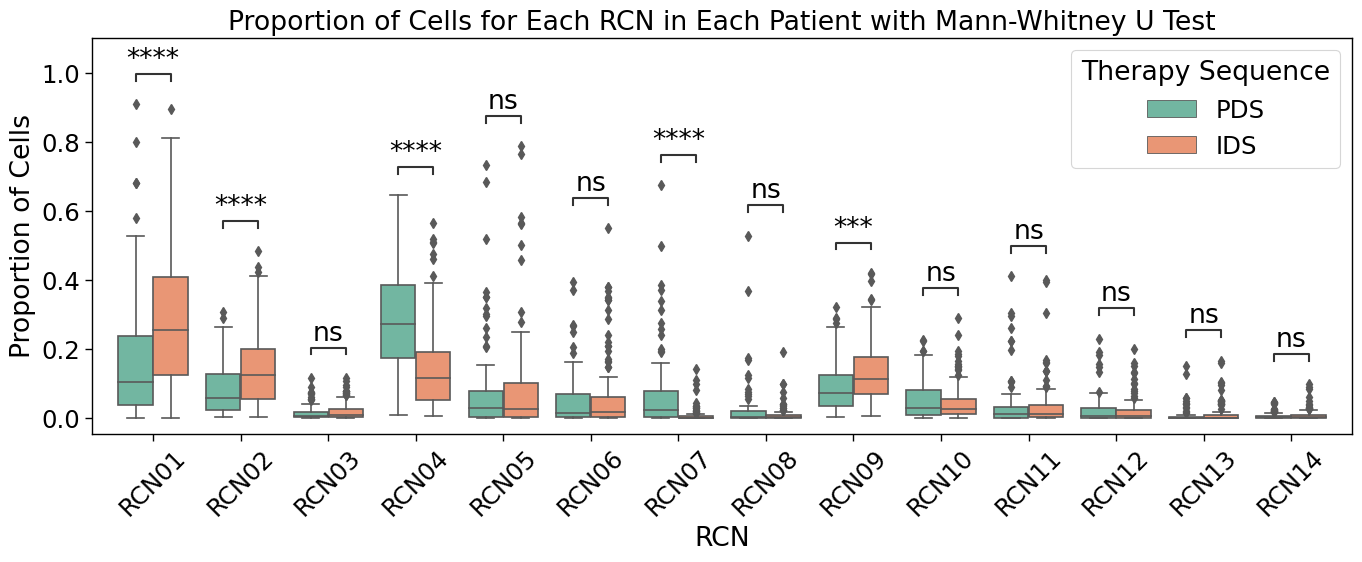

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

# Calculate the proportion of CellId for each RCN within each imageid
df_grouped = (
    filtered_df.groupby(['patient', 'rcn_id', 'therapy_sequence'])
    .size()
    .reset_index(name='cell_count')
)

# Calculate total cell count for each imageid
total_counts = filtered_df.groupby('patient').size().reset_index(name='total_count')

# Merge to get the total count in the same dataframe
df_grouped = df_grouped.merge(total_counts, on='patient')

# Calculate the proportion
df_grouped['proportion'] = df_grouped['cell_count'] / df_grouped['total_count']

plot_rcnproportion_boxplot(df_grouped, 'Patient')


Mann whitney U test:  8262.0 P-value 1.3022034854773846e-06
Mann whitney U test:  8230.0 P-value 3.389437529746355e-06
Mann whitney U test:  6461.0 P-value 0.35963220334775703
Mann whitney U test:  2705.0 P-value 2.5471404251618017e-12
Mann whitney U test:  4967.0 P-value 0.7213333835537357
Mann whitney U test:  6143.0 P-value 0.3551425753518783
Mann whitney U test:  2145.0 P-value 8.29421369976032e-11
Mann whitney U test:  4393.0 P-value 0.10832015313759988
Mann whitney U test:  7821.0 P-value 0.00015470994579161253
Mann whitney U test:  5729.0 P-value 0.5318938552285808
Mann whitney U test:  5517.0 P-value 0.298269798455961
Mann whitney U test:  5559.0 P-value 0.8842722557386322
Mann whitney U test:  3381.0 P-value 0.16825962924174964
Mann whitney U test:  5561.0 P-value 0.7452389339755117


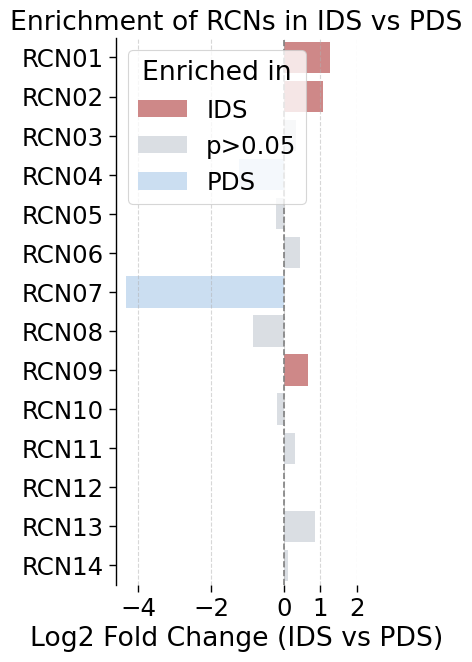

In [60]:
plot_foldchange_inIDSandPDS(df_grouped)